In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# #Reading the data set 

In [2]:
Hotel_Bookings = pd.read_excel("C:/Users/Vidhut Sharma/Desktop/hotel_bookings_Capstone1.xlsx")
Hotel_Bookings.head(10)

,hotel,is_canceled,booking_date,arrival_date,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,totalno_of_special_requests
0,type_2,0,2017-07-24,2018-07-01,0,0,2,0,Only Breakfast,PRT,...,C,C,3,No Deposit,NaN,NaN,0,Transient,0,0
1,type_2,0,2016-06-24,2018-07-01,0,0,2,0,Only Breakfast,PRT,...,C,C,4,No Deposit,NaN,NaN,0,Transient,0,0
2,type_2,0,2018-06-24,2018-07-01,0,1,1,0,Only Breakfast,GBR,...,A,C,0,No Deposit,NaN,NaN,0,Transient,0,0
3,type_2,0,2018-06-18,2018-07-01,0,1,1,0,Only Breakfast,GBR,...,A,A,0,No Deposit,304.0,NaN,0,Transient,0,0
4,type_2,0,2018-06-17,2018-07-01,0,2,2,0,Only Breakfast,GBR,...,A,A,0,No Deposit,240.0,NaN,0,Transient,0,1
5,type_2,0,2018-06-17,2018-07-01,0,2,2,0,Only Breakfast,GBR,...,A,A,0,No Deposit,240.0,NaN,0,Transient,0,1
6,type_2,0,2018-07-01,2018-07-01,0,2,2,0,Only Breakfast,PRT,...,C,C,0,No Deposit,NaN,NaN,0,Transient,0,0
7,type_2,0,2018-06-22,2018-07-01,0,2,2,0,"Breakfast, lunch & dinner",PRT,...,C,C,0,No Deposit,303.0,NaN,0,Transient,0,1
8,type_2,1,2018-04-07,2018-07-01,0,3,2,0,Only Breakfast,PRT,...,A,A,0,No Deposit,240.0,NaN,0,Transient,0,1
9,type_2,1,2018-04-17,2018-07-01,0,3,2,0,Breakfast & dinner,PRT,...,D,D,0,No Deposit,15.0,NaN,0,Transient,0,0


In [3]:
Hotel_Bookings[Hotel_Bookings["deposit_type"] == "Non Refund"]["is_canceled"].value_counts()

1    14494
0       93
Name: is_canceled, dtype: int64

# Checking the number of rows and column for the data

In [4]:
Hotel_Bookings.shape

(119390, 25)

# Checking the data types of the data and for the missing values and NA values

In [5]:
Hotel_Bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   booking_date                    119390 non-null  datetime64[ns]
 3   arrival_date                    119390 non-null  datetime64[ns]
 4   stays_in_weekend_nights         119390 non-null  int64         
 5   stays_in_week_nights            119390 non-null  int64         
 6   adults                          119390 non-null  int64         
 7   children                        119390 non-null  int64         
 8   meal                            119390 non-null  object        
 9   country                         118902 non-null  object        
 10  market_segment                  119390 non-null  object 

In [6]:
#Na Values check
Hotel_Bookings.isnull().sum()

hotel                                  0
is_canceled                            0
booking_date                           0
arrival_date                           0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_customer                   0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type                          0
required_car_parking_spaces            0
totalno_of_speci

Dropping the Features which are Country , Agent and Company as these are not the parameters which we can say will impactthe hotel cancellation and if we observe there are around 1 lakh + rows empty in the company column .If we remove that many NA values we may loose lot of our useful insights.

In [7]:
Hotel_Bookings.drop(["country","agent","company"],axis=1,inplace = True)

In [8]:
#Na Values check after removal of variables 
Hotel_Bookings.isnull().sum()

hotel                             0
is_canceled                       0
booking_date                      0
arrival_date                      0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_customer              0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
required_car_parking_spaces       0
totalno_of_special_requests       0
dtype: int64

In [9]:
Hotel_Bookings

,hotel,is_canceled,booking_date,arrival_date,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,market_segment,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,totalno_of_special_requests
0,type_2,0,2017-07-24,2018-07-01,0,0,2,0,Only Breakfast,Direct,...,0,0,C,C,3,No Deposit,0,Transient,0,0
1,type_2,0,2016-06-24,2018-07-01,0,0,2,0,Only Breakfast,Direct,...,0,0,C,C,4,No Deposit,0,Transient,0,0
2,type_2,0,2018-06-24,2018-07-01,0,1,1,0,Only Breakfast,Direct,...,0,0,A,C,0,No Deposit,0,Transient,0,0
3,type_2,0,2018-06-18,2018-07-01,0,1,1,0,Only Breakfast,Corporate,...,0,0,A,A,0,No Deposit,0,Transient,0,0
4,type_2,0,2018-06-17,2018-07-01,0,2,2,0,Only Breakfast,Online Travel Agents,...,0,0,A,A,0,No Deposit,0,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,type_1,0,2020-08-07,2020-08-30,2,5,2,0,Only Breakfast,Offline Travel Agents/Operators,...,0,0,A,A,0,No Deposit,0,Transient,0,0
119386,type_1,0,2020-05-21,2020-08-31,2,5,3,0,Only Breakfast,Online Travel Agents,...,0,0,E,E,0,No Deposit,0,Transient,0,2
119387,type_1,0,2020-07-28,2020-08-31,2,5,2,0,Only Breakfast,Online Travel Agents,...,0,0,D,D,0,No Deposit,0,Transient,0,4
119388,type_1,0,2020-05-14,2020-08-31,2,5,2,0,Only Breakfast,Online Travel Agents,...,0,0,A,A,0,No Deposit,0,Transient,0,0


Now checking the difference between the booking date and arrival date. The difference will suggest us on how many days prior the arrival the customer books the hotel.


There are 94,428 rows in which there is the difference less than 180 days which we will be taking into consideration as anything above 180 days does not feel that secured that a person will not cancel the hotel

In [10]:
Df_Of_Dates_Diff = pd.DataFrame({"booking_date": Hotel_Bookings["booking_date"],"arrival_date" : Hotel_Bookings['arrival_date'],"Difference":Hotel_Bookings['arrival_date'] - Hotel_Bookings["booking_date"]})
G = str(Df_Of_Dates_Diff["Difference"][0])
int(G.split()[0])
Dates_DiffList = []
for i in range(0,len(Df_Of_Dates_Diff["Difference"])):
    G = str(Df_Of_Dates_Diff["Difference"][i])
    Dates_DiffList.append(int(G.split()[0]))
Df_Of_Dates_Diff["Difference"] = Dates_DiffList

Adding the Difference of dates in the Main Data of Hotel Cancellation

In [11]:
Hotel_Bookings["Difference_Between_Booking_Arrival_Dates"] = Df_Of_Dates_Diff["Difference"]

In [12]:
Hotel_Bookings["meal"].value_counts()

Only Breakfast               92310
Breakfast & dinner           14463
No meal                      11819
Breakfast, lunch & dinner      798
Name: meal, dtype: int64

# Starting the Univariate and Bivariate Analysis

In [13]:
Hotel_Bookings["meal"].dtypes =="object"

True

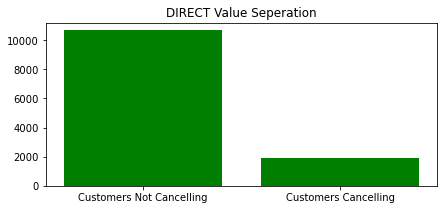

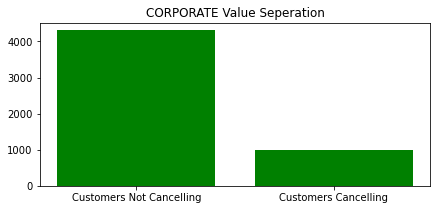

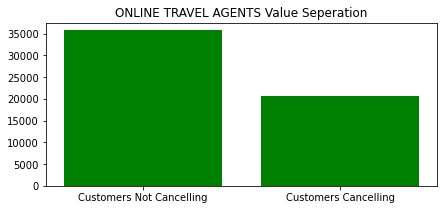

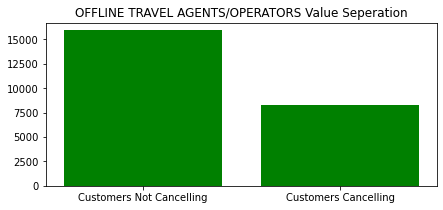

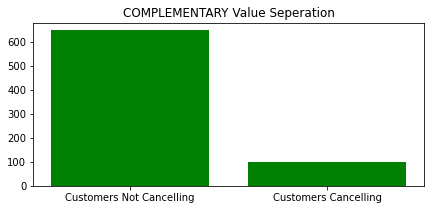

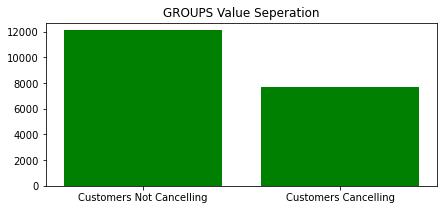

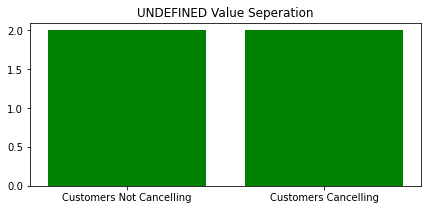

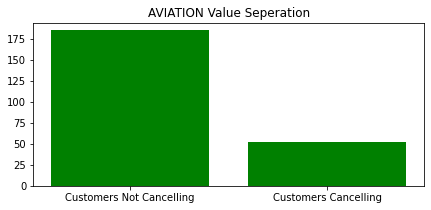

In [14]:
Hotel_Bookings["is_canceled"].unique()

for name in Hotel_Bookings["market_segment"].unique():
    fig = plt.figure(figsize = (7, 3))
    plt.bar(("Customers Not Cancelling","Customers Cancelling"),Hotel_Bookings[Hotel_Bookings["market_segment"]==name]["is_canceled"].value_counts(),color = "green")
    plt.title(name.upper() + " Value Seperation")
    plt.show()
#sns.barplot(x = Hotel_Bookings["is_canceled"].unique(),y = Hotel_Bookings[Hotel_Bookings["market_segment"]=="Online Travel Agents"]["is_canceled"].value_counts())


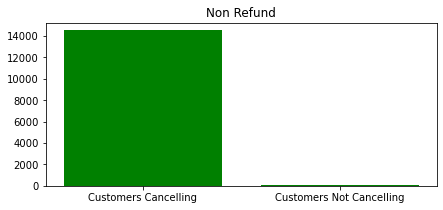

In [15]:
Hotel_Bookings["is_canceled"].unique()

#for name in Hotel_Bookings["deposit_type"].unique():
fig = plt.figure(figsize = (7, 3))
plt.bar(("Customers Cancelling","Customers Not Cancelling"),Hotel_Bookings[Hotel_Bookings["deposit_type"]=="Non Refund"]["is_canceled"].value_counts(),color = "green")
plt.title("Non Refund")
plt.show()


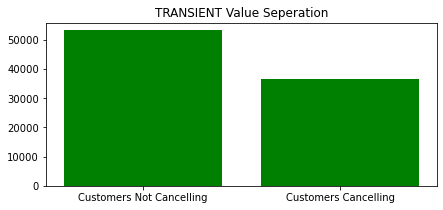

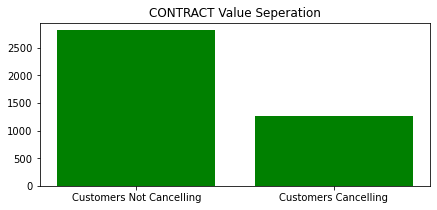

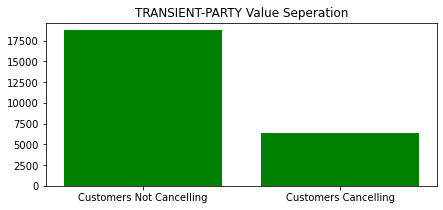

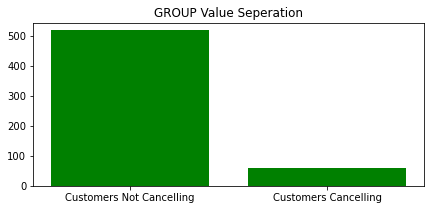

In [16]:
for name in Hotel_Bookings["customer_type"].unique():
    fig = plt.figure(figsize = (7, 3))
    plt.bar(("Customers Not Cancelling","Customers Cancelling"),Hotel_Bookings[Hotel_Bookings["customer_type"]==name]["is_canceled"].value_counts(),color = "green")
    plt.title(name.upper() + " Value Seperation")
    plt.show()


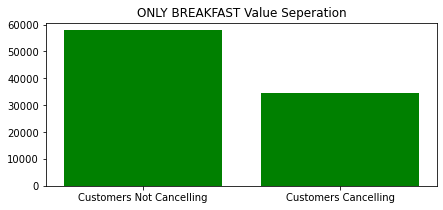

0    57800
1    34510
Name: is_canceled, dtype: int64 92310


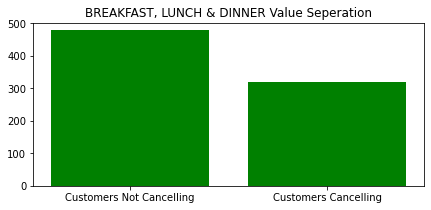

1    478
0    320
Name: is_canceled, dtype: int64 798


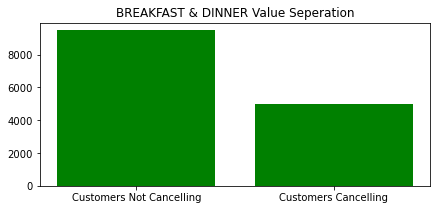

0    9479
1    4984
Name: is_canceled, dtype: int64 14463


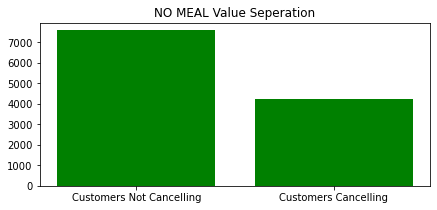

0    7567
1    4252
Name: is_canceled, dtype: int64 11819


In [17]:
for name in Hotel_Bookings["meal"].unique():
    fig = plt.figure(figsize = (7, 3))
    plt.bar(("Customers Not Cancelling","Customers Cancelling"),Hotel_Bookings[Hotel_Bookings["meal"]==name]["is_canceled"].value_counts(),color = "green")
    plt.title(name.upper() + " Value Seperation")
    plt.show()
    print(Hotel_Bookings[Hotel_Bookings["meal"]==name]["is_canceled"].value_counts(),sum(Hotel_Bookings[Hotel_Bookings["meal"]==name]["is_canceled"].value_counts()))
    

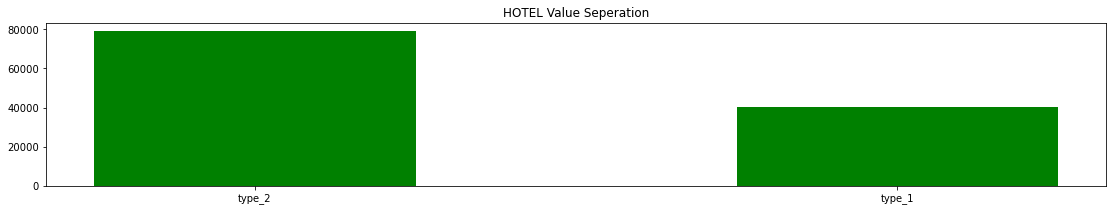

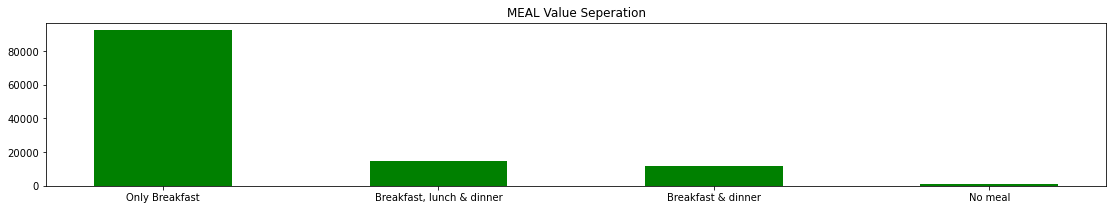

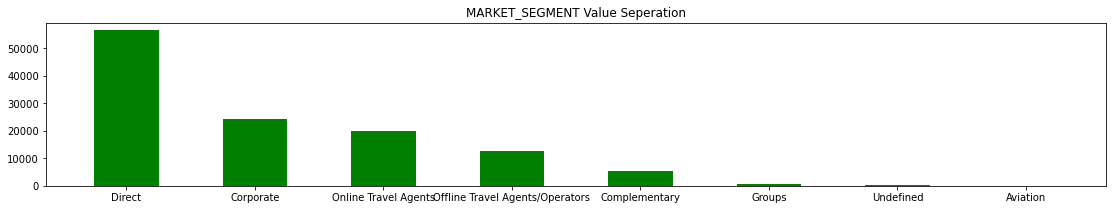

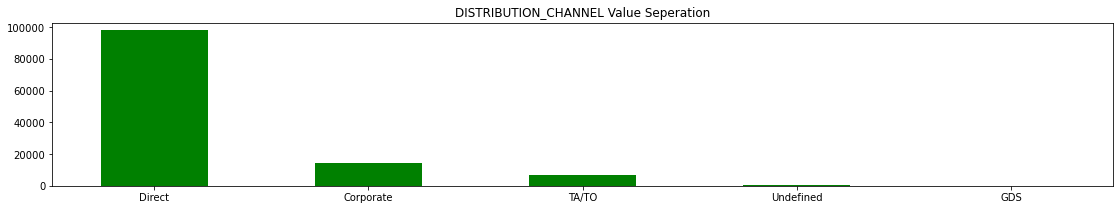

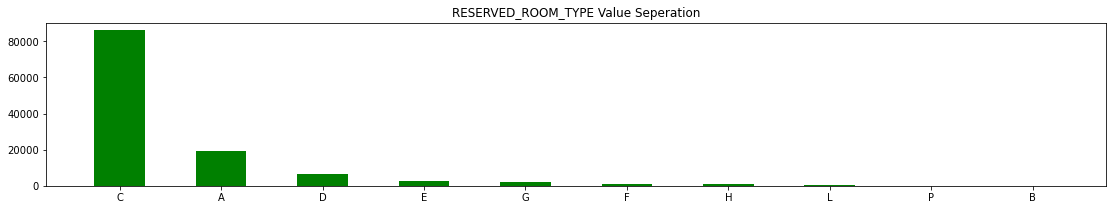

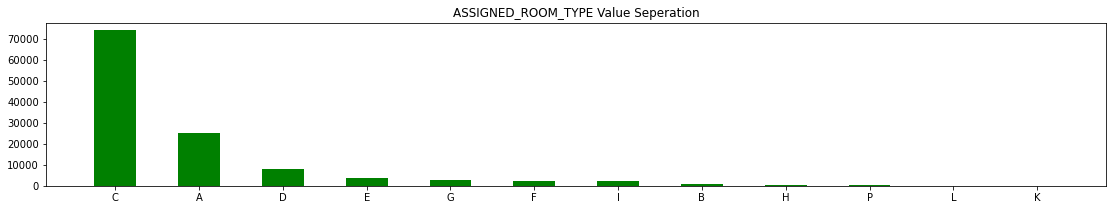

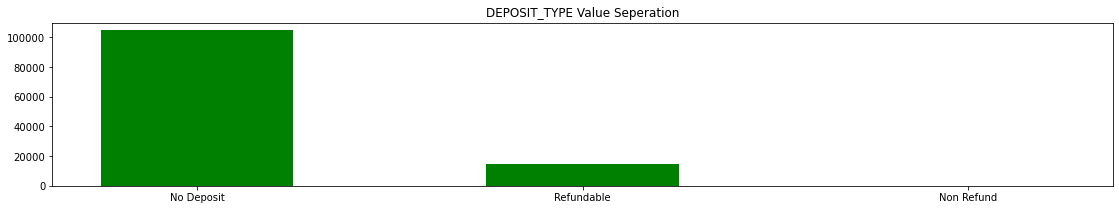

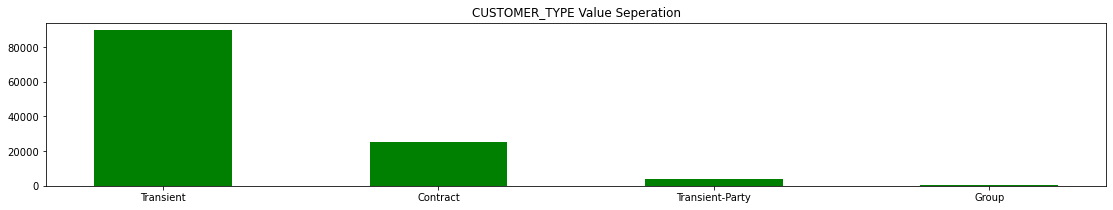

In [18]:
for name in Hotel_Bookings.columns:
    if Hotel_Bookings[name].dtypes == "object":
        fig = plt.figure(figsize = (19, 3))
        plt.bar(Hotel_Bookings[name].unique(),Hotel_Bookings[name].value_counts(),color = "green",width =0.5)
        plt.title(name.upper() + " Value Seperation")
        plt.show()

For the Bivariate Analysis we will be using the pairplot as it gives relationship with the dependent variable and independent variables and between independent and indepedent variable as well

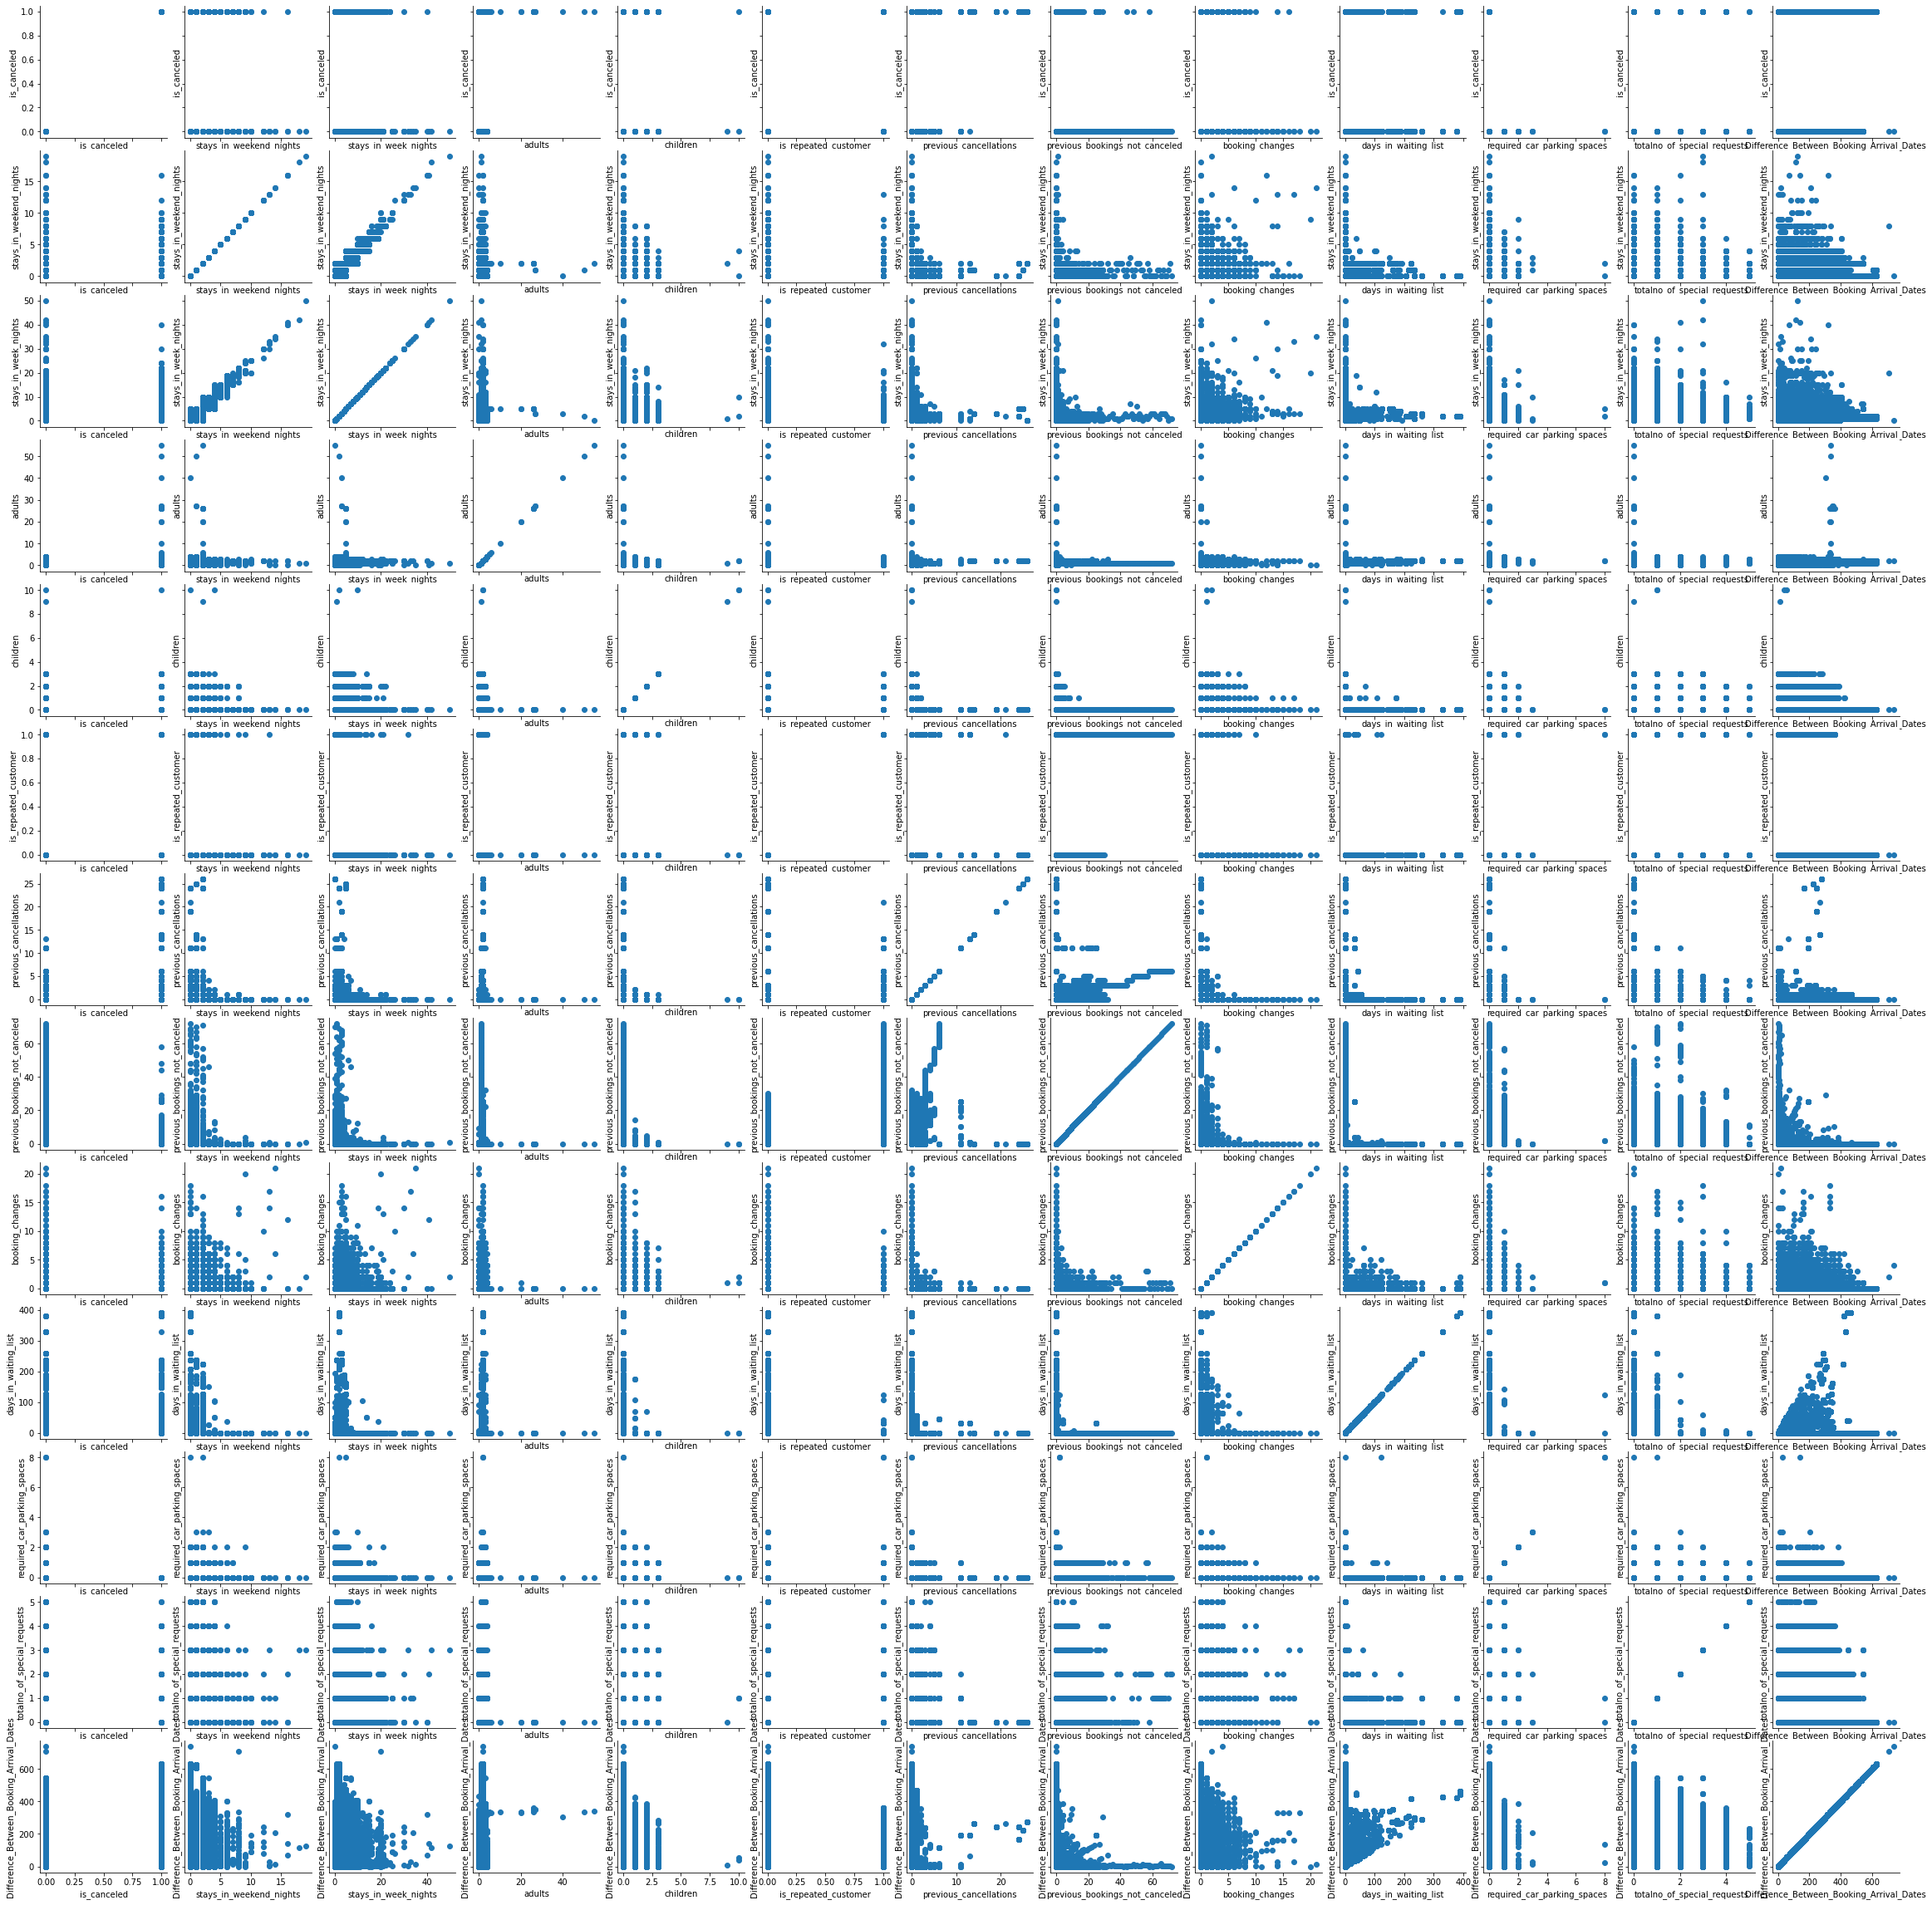

In [19]:
#sns.pairplot(Hotel_Bookings,aspect = 0.5);
#sns.PairGrid(Hotel_Bookings,aspect = 0.5)
Hotel_Data = sns.PairGrid(Hotel_Bookings,)
Hotel_Data = Hotel_Data.map(plt.scatter)

x_label,y_label = [],[]

for ax in Hotel_Data.axes[-1,:]:
    x_lab = ax.xaxis.get_label_text()
    x_label.append(x_lab)
for ax in Hotel_Data.axes[:,0]:
    y_lab = ax.yaxis.get_label_text()
    y_label.append(y_lab)

for i in range(len(x_label)):
    for j in range(len(y_label)):
        Hotel_Data.axes[j,i].xaxis.set_label_text(x_label[i])
        Hotel_Data.axes[j,i].yaxis.set_label_text(y_label[j])

plt.show()

In [20]:
#Correalation Plot using heat map

Checking for the Outliers present in the data set and we observe that the "stays_in_weekend_nights" and "stays_in_week_nights" have outliers present into them as compared to other features selected such as "adults" and "children" and "previous_cancellations" and "previous_bookings_not_canceled" 

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


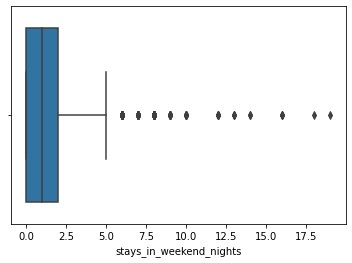

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


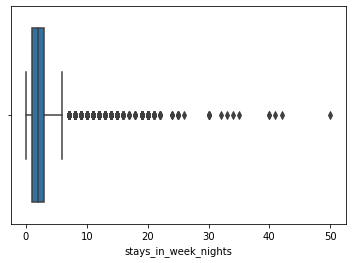

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


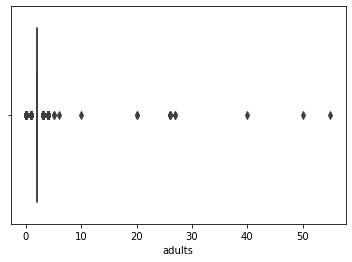

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


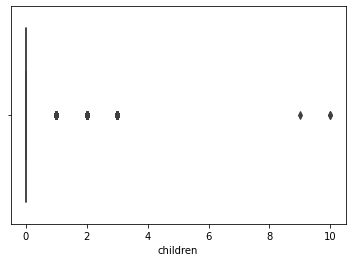

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


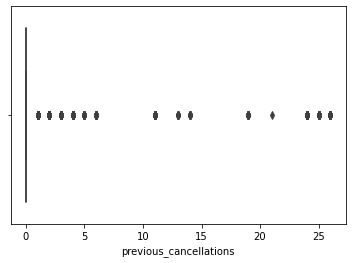

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


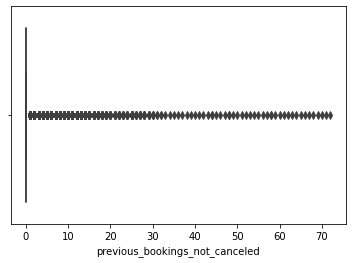

In [21]:
CheckForOutliers_Column_Selected = Hotel_Bookings[["stays_in_weekend_nights","stays_in_week_nights","adults","children","previous_cancellations","previous_bookings_not_canceled"]]
CheckForOutliers_Column_Selected
for name in CheckForOutliers_Column_Selected.columns:
    sns.boxplot(CheckForOutliers_Column_Selected[name])
    plt.show()

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


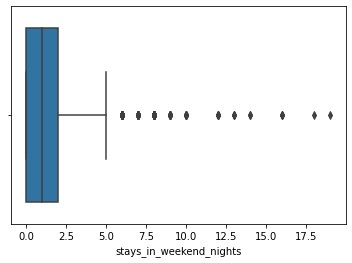

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


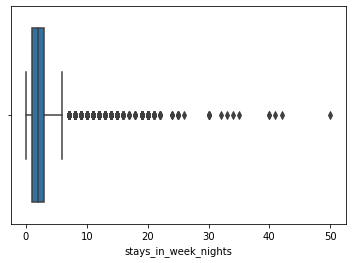

In [22]:
CheckForOutliers_Column_Selected = Hotel_Bookings[["stays_in_weekend_nights","stays_in_week_nights"]]
for name in CheckForOutliers_Column_Selected.columns:
    sns.boxplot(CheckForOutliers_Column_Selected[name])
    plt.show()

In [23]:
def remove_outliers_data(names):
    Q1 = Hotel_Bookings[names].describe()["25%"]
    Q3 = Hotel_Bookings[names].describe()["75%"]
    IQR = Q3 - Q1
    UL = Q3+ (1.5 * IQR)
    return UL

In [24]:
for data in CheckForOutliers_Column_Selected.columns:
    Hotel_Bookings[data] = np.where(CheckForOutliers_Column_Selected[data] > remove_outliers_data(names = data) ,remove_outliers_data(data),CheckForOutliers_Column_Selected[data])

Checking if outliers are removed from the features "stays_in_weekend_nights" and "stays_in_week_nights"

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


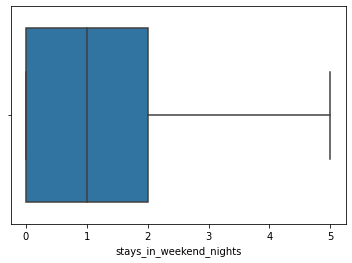

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


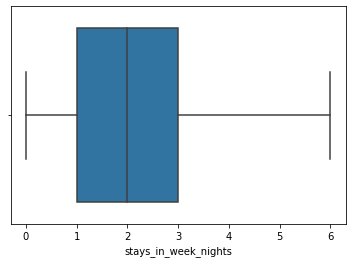

In [25]:
CheckForOutliers_Column_Selected = Hotel_Bookings[["stays_in_weekend_nights","stays_in_week_nights"]]
for name in CheckForOutliers_Column_Selected.columns:
    sns.boxplot(Hotel_Bookings[name])
    plt.show()

Transformation is required for the categorical variables as they have there categories in character format while modelling the variables should be converted to numrical categorical data for the model building  

In [26]:
#Type Of Hotel
Hotel_Bookings["hotel"] = np.where(Hotel_Bookings["hotel"] == "type_1",0,Hotel_Bookings["hotel"])
Hotel_Bookings["hotel"] = np.where(Hotel_Bookings["hotel"] == "type_2",1,Hotel_Bookings["hotel"])
#Meal 
Hotel_Bookings["meal"] = np.where(Hotel_Bookings["meal"] == "Only Breakfast",0,Hotel_Bookings["meal"])
Hotel_Bookings["meal"] = np.where(Hotel_Bookings["meal"] == "Breakfast, lunch & dinner",1,Hotel_Bookings["meal"])
Hotel_Bookings["meal"] = np.where(Hotel_Bookings["meal"] == "Breakfast & dinner",2,Hotel_Bookings["meal"])
Hotel_Bookings["meal"] = np.where(Hotel_Bookings["meal"] == "No meal",3,Hotel_Bookings["meal"])
Hotel_Bookings["meal"].value_counts()

#Market_Segment
Hotel_Bookings["market_segment"] = np.where(Hotel_Bookings["market_segment"] == "Direct",0,Hotel_Bookings["market_segment"])
Hotel_Bookings["market_segment"] = np.where(Hotel_Bookings["market_segment"] == "Corporate",1,Hotel_Bookings["market_segment"])
Hotel_Bookings["market_segment"] = np.where(Hotel_Bookings["market_segment"] == "Online Travel Agents",2,Hotel_Bookings["market_segment"])
Hotel_Bookings["market_segment"] = np.where(Hotel_Bookings["market_segment"] == "Offline Travel Agents/Operators",3,Hotel_Bookings["market_segment"])
Hotel_Bookings["market_segment"] = np.where(Hotel_Bookings["market_segment"] == "Complementary",4,Hotel_Bookings["market_segment"])
Hotel_Bookings["market_segment"] = np.where(Hotel_Bookings["market_segment"] == "Groups",5,Hotel_Bookings["market_segment"])
Hotel_Bookings["market_segment"] = np.where(Hotel_Bookings["market_segment"] == "Undefined",6,Hotel_Bookings["market_segment"])
Hotel_Bookings["market_segment"] = np.where(Hotel_Bookings["market_segment"] == "Aviation",7,Hotel_Bookings["market_segment"])

#Distribution Channel
Hotel_Bookings["distribution_channel"] = np.where(Hotel_Bookings["distribution_channel"] == "Direct",0,Hotel_Bookings["distribution_channel"])
Hotel_Bookings["distribution_channel"] = np.where(Hotel_Bookings["distribution_channel"] == "Corporate",1,Hotel_Bookings["distribution_channel"])
Hotel_Bookings["distribution_channel"] = np.where(Hotel_Bookings["distribution_channel"] == "TA/TO",2,Hotel_Bookings["distribution_channel"])
Hotel_Bookings["distribution_channel"] = np.where(Hotel_Bookings["distribution_channel"] == "Undefined",3,Hotel_Bookings["distribution_channel"])
Hotel_Bookings["distribution_channel"] = np.where(Hotel_Bookings["distribution_channel"] == "GDS",4,Hotel_Bookings["distribution_channel"])

#Reserved Room Types
Hotel_Bookings["reserved_room_type"] = np.where(Hotel_Bookings["reserved_room_type"] == "A",0,Hotel_Bookings["reserved_room_type"])
Hotel_Bookings["reserved_room_type"] = np.where(Hotel_Bookings["reserved_room_type"] == "B",1,Hotel_Bookings["reserved_room_type"])
Hotel_Bookings["reserved_room_type"] = np.where(Hotel_Bookings["reserved_room_type"] == "C",2,Hotel_Bookings["reserved_room_type"])
Hotel_Bookings["reserved_room_type"] = np.where(Hotel_Bookings["reserved_room_type"] == "D",3,Hotel_Bookings["reserved_room_type"])
Hotel_Bookings["reserved_room_type"] = np.where(Hotel_Bookings["reserved_room_type"] == "E",4,Hotel_Bookings["reserved_room_type"])
Hotel_Bookings["reserved_room_type"] = np.where(Hotel_Bookings["reserved_room_type"] == "F",5,Hotel_Bookings["reserved_room_type"])
Hotel_Bookings["reserved_room_type"] = np.where(Hotel_Bookings["reserved_room_type"] == "G",6,Hotel_Bookings["reserved_room_type"])
Hotel_Bookings["reserved_room_type"] = np.where(Hotel_Bookings["reserved_room_type"] == "H",7,Hotel_Bookings["reserved_room_type"])
Hotel_Bookings["reserved_room_type"] = np.where(Hotel_Bookings["reserved_room_type"] == "L",11,Hotel_Bookings["reserved_room_type"])
Hotel_Bookings["reserved_room_type"] = np.where(Hotel_Bookings["reserved_room_type"] == "P",15,Hotel_Bookings["reserved_room_type"])

#Assigned Room Type
Hotel_Bookings["assigned_room_type"] = np.where(Hotel_Bookings["assigned_room_type"] == "A",0,Hotel_Bookings["assigned_room_type"])
Hotel_Bookings["assigned_room_type"] = np.where(Hotel_Bookings["assigned_room_type"] == "B",1,Hotel_Bookings["assigned_room_type"])
Hotel_Bookings["assigned_room_type"] = np.where(Hotel_Bookings["assigned_room_type"] == "C",2,Hotel_Bookings["assigned_room_type"])
Hotel_Bookings["assigned_room_type"] = np.where(Hotel_Bookings["assigned_room_type"] == "D",3,Hotel_Bookings["assigned_room_type"])
Hotel_Bookings["assigned_room_type"] = np.where(Hotel_Bookings["assigned_room_type"] == "E",4,Hotel_Bookings["assigned_room_type"])
Hotel_Bookings["assigned_room_type"] = np.where(Hotel_Bookings["assigned_room_type"] == "F",5,Hotel_Bookings["assigned_room_type"])
Hotel_Bookings["assigned_room_type"] = np.where(Hotel_Bookings["assigned_room_type"] == "G",6,Hotel_Bookings["assigned_room_type"])
Hotel_Bookings["assigned_room_type"] = np.where(Hotel_Bookings["assigned_room_type"] == "H",7,Hotel_Bookings["assigned_room_type"])
Hotel_Bookings["assigned_room_type"] = np.where(Hotel_Bookings["assigned_room_type"] == "I",8,Hotel_Bookings["assigned_room_type"])
Hotel_Bookings["assigned_room_type"] = np.where(Hotel_Bookings["assigned_room_type"] == "K",10,Hotel_Bookings["assigned_room_type"])
Hotel_Bookings["assigned_room_type"] = np.where(Hotel_Bookings["assigned_room_type"] == "L",11,Hotel_Bookings["assigned_room_type"])
Hotel_Bookings["assigned_room_type"] = np.where(Hotel_Bookings["assigned_room_type"] == "P",15,Hotel_Bookings["assigned_room_type"])

#Deposit Type
Hotel_Bookings["deposit_type"] = np.where(Hotel_Bookings["deposit_type"] == "No Deposit",0,Hotel_Bookings["deposit_type"])
Hotel_Bookings["deposit_type"] = np.where(Hotel_Bookings["deposit_type"] == "Refundable",1,Hotel_Bookings["deposit_type"])
Hotel_Bookings["deposit_type"] = np.where(Hotel_Bookings["deposit_type"] == "Non Refund",2,Hotel_Bookings["deposit_type"])

# Customer Type
Hotel_Bookings["customer_type"] = np.where(Hotel_Bookings["customer_type"] == "Transient",0,Hotel_Bookings["customer_type"])
Hotel_Bookings["customer_type"] = np.where(Hotel_Bookings["customer_type"] == "Contract",1,Hotel_Bookings["customer_type"])
Hotel_Bookings["customer_type"] = np.where(Hotel_Bookings["customer_type"] == "Transient-Party",2,Hotel_Bookings["customer_type"])
Hotel_Bookings["customer_type"] = np.where(Hotel_Bookings["customer_type"] == "Group",3,Hotel_Bookings["customer_type"])

Hotel_Bookings

,hotel,is_canceled,booking_date,arrival_date,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,market_segment,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,totalno_of_special_requests,Difference_Between_Booking_Arrival_Dates
0,1,0,2017-07-24,2018-07-01,0.0,0.0,2,0,0,0,...,0,2,2,3,0,0,0,0,0,342
1,1,0,2016-06-24,2018-07-01,0.0,0.0,2,0,0,0,...,0,2,2,4,0,0,0,0,0,737
2,1,0,2018-06-24,2018-07-01,0.0,1.0,1,0,0,0,...,0,0,2,0,0,0,0,0,0,7
3,1,0,2018-06-18,2018-07-01,0.0,1.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,13
4,1,0,2018-06-17,2018-07-01,0.0,2.0,2,0,0,2,...,0,0,0,0,0,0,0,0,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,2020-08-07,2020-08-30,2.0,5.0,2,0,0,3,...,0,0,0,0,0,0,0,0,0,23
119386,0,0,2020-05-21,2020-08-31,2.0,5.0,3,0,0,2,...,0,4,4,0,0,0,0,0,2,102
119387,0,0,2020-07-28,2020-08-31,2.0,5.0,2,0,0,2,...,0,3,3,0,0,0,0,0,4,34
119388,0,0,2020-05-14,2020-08-31,2.0,5.0,2,0,0,2,...,0,0,0,0,0,0,0,0,0,109


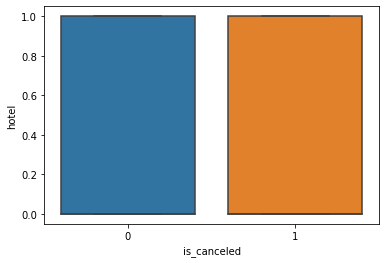

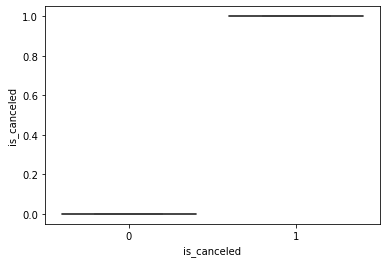

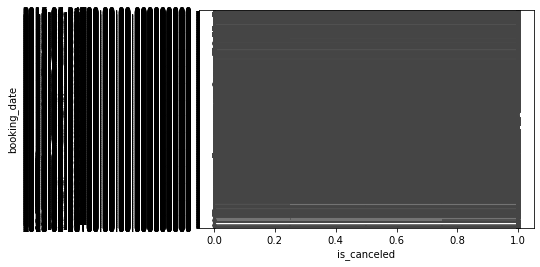

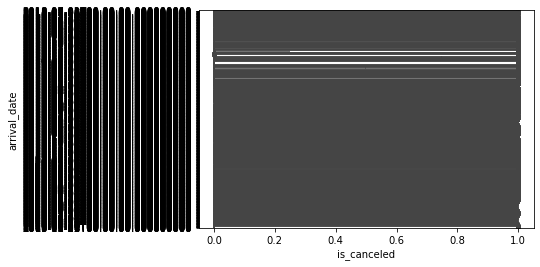

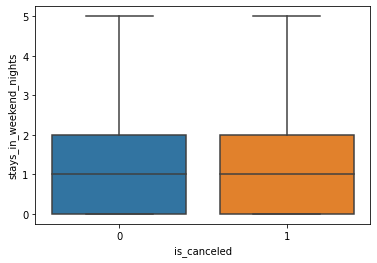

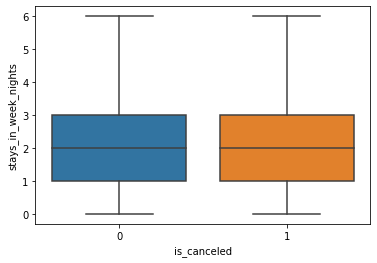

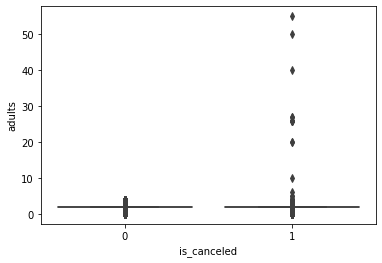

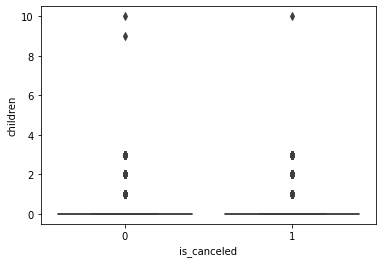

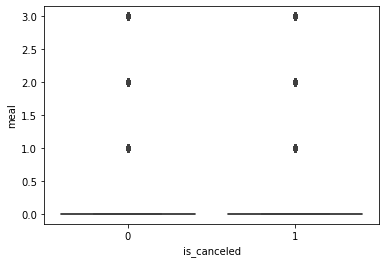

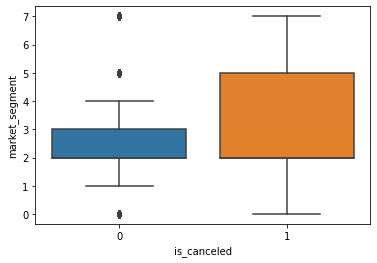

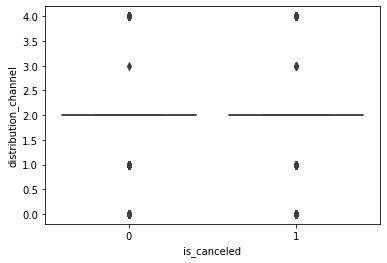

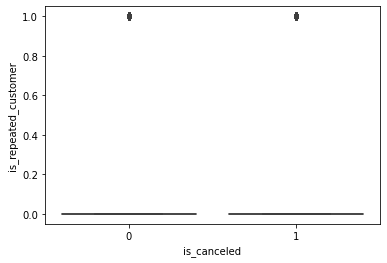

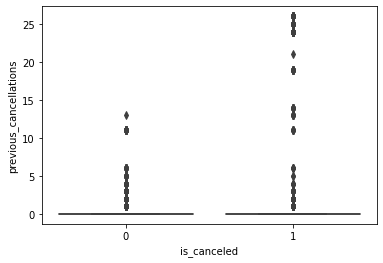

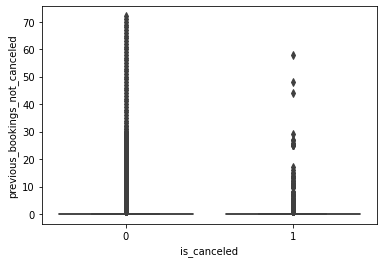

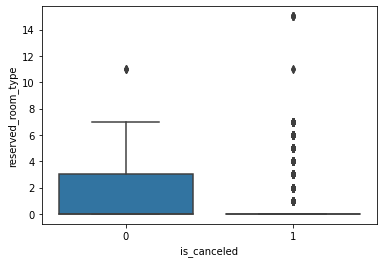

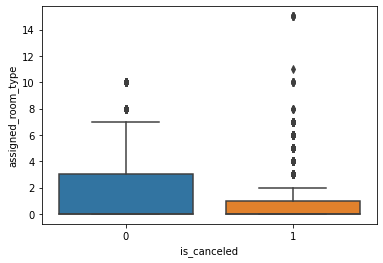

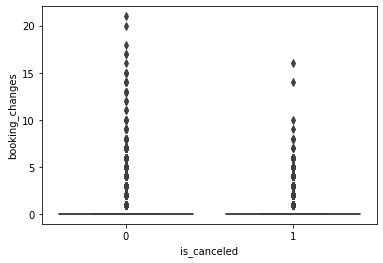

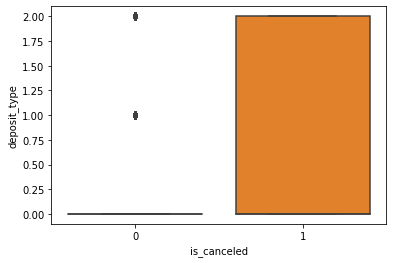

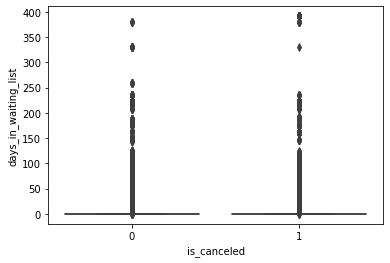

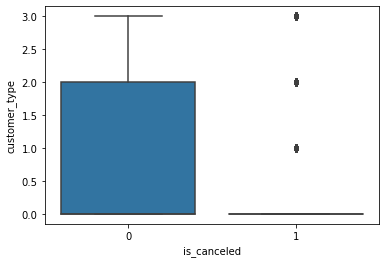

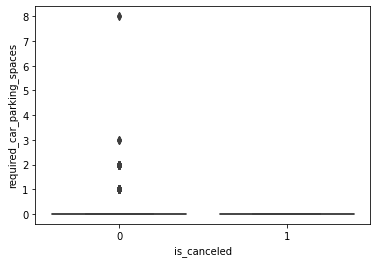

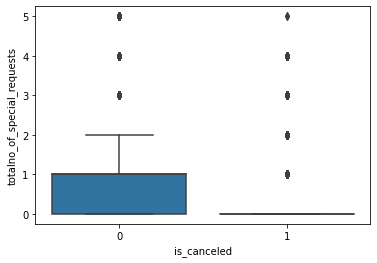

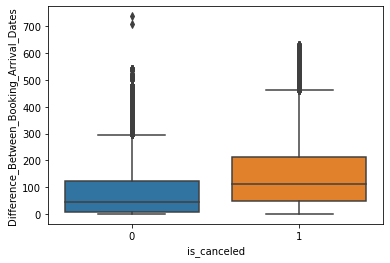

In [27]:
for name in Hotel_Bookings.columns:
    sns.boxplot(x = Hotel_Bookings["is_canceled"],y= Hotel_Bookings[name])
    plt.show()

# Checking if the data set is unbalanced or not 


If the data is split in 60 - 40 or 50 -50 it is considered as good spread of data but in this case our data is split in approx. 63 - 37 which is kind of a ok split but it also has pinch oversampling.So to deal with it we might use oversampling method SMOTE

The percentage of customers who did not cancel their bookinsg are 0.6295837172292487 %
The percentage of customers who did cancel their bookinsg are 0.37041628277075134 %


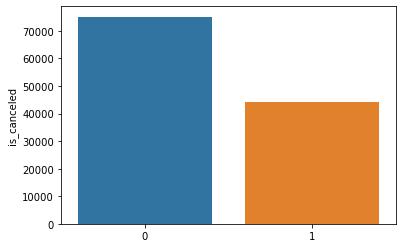

In [28]:
sns.barplot(x = Hotel_Bookings["is_canceled"].unique(), y = Hotel_Bookings["is_canceled"].value_counts());
print("The percentage of customers who did not cancel their bookinsg are",Hotel_Bookings["is_canceled"].value_counts(normalize=True)[0],"%")
print("The percentage of customers who did cancel their bookinsg are",Hotel_Bookings["is_canceled"].value_counts(normalize=True)[1],"%")

Clustering of data according to the difference between booking and arrival dates

In [29]:
from sklearn.cluster import KMeans

In [30]:
Hotel_Bookings_Without_Booking_Date_And_Arrival_Date = Hotel_Bookings.drop(["booking_date","arrival_date"],axis =1)
kmeans = KMeans(n_clusters= 3)

In [31]:
kmeans.fit(Hotel_Bookings_Without_Booking_Date_And_Arrival_Date);

In [32]:
kmeans.labels_
Hotel_Bookings_Without_Booking_Date_And_Arrival_Date["Cluster_Of_Data"] = kmeans.labels_

Before balancing the data we should divide the data into training and testing data 


In [33]:
from sklearn.model_selection import train_test_split

Firstly splitting the data in independent and Dependent variable

In [34]:
X = Hotel_Bookings.drop(["is_canceled","booking_date","arrival_date","Difference_Between_Booking_Arrival_Dates"],axis =1)
y = Hotel_Bookings["is_canceled"]

Second, now having the X and y we have to split the data reason for taking the random state in the train_test_split is that as we know our data is kind of imbalaced which can either give a lot of one category into train and less into test which can make our model predictions biased

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X , y ,test_size= 0.3,random_state= 43,stratify= y)

Checking in X_train if there are any NA values after split are present or not 

In [36]:
np.where(X_train.isna(),0,X_train.isna())

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Now starting with the Model building and first models which we will be taking into consideration will be Regression Models which are Linear and Logistics Regression. Importing regression models from sklearn package.

In the case of regression models for checking if the model has performed good or not we use performance metrics which are RMSE[Root Mean Squared Error],MSE[Mean Squared Error],MAPE[Mean Absolute Percentage Error].As much these values are less the better the model performance

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from math import sqrt
from sklearn.metrics import mean_absolute_percentage_error

# Starting With Logistics Regression

Taking the solver as Saga as it is considered to be good while we deal with huge data sets and with that we will be using stats.api package as well for the Logistic Regression Calculation to get other parameters such as R square and Adjsuted R Square as well

In [38]:
LogReg = LogisticRegression(solver="saga")

In [39]:
LogReg.fit(X_train , y_train)

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(solver='saga')

# Train Data Set Check for Logistics Regression

In [40]:
LogReg.score(X_train, y_train)

0.7784092948679597

Mean Square Error , Root Mean Square Error , Mean Absolute Percentage Error

In [41]:
Observed = y_train
Predicted = LogReg.predict(X_train)

mse = np.mean((Observed-Predicted)**2)
print("The Mean Squared Error is:",mse)
rmse = sqrt(mse)
print("The Root Mean Squared Error is:",rmse)
print("The Mean Absolute Percentage Error is:",mean_absolute_percentage_error(Observed,Predicted))

Log_RegDf = pd.DataFrame({"Model": "Logistic Regression(Train)","Mean Squared Error":[mse],"Root Mean Squared Error": [rmse],"Mean Absolute Percentage Error":[mean_absolute_percentage_error(Observed,Predicted)]})
Log_RegDf

The Mean Squared Error is: 0.22159070513204024
The Root Mean Squared Error is: 0.4707342192065925
The Mean Absolute Percentage Error is: 133211662604667.6


,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Logistic Regression(Train),0.221591,0.470734,1.332117e+14


In [42]:
from sklearn.metrics import confusion_matrix , classification_report , roc_auc_score,roc_curve

In [43]:
#prediction data for Train data set
y_train_pred = LogReg.predict(X_train)


Confusion matrix , Classification Report , Roc_Curve, Roc_auc_curve

<AxesSubplot:>

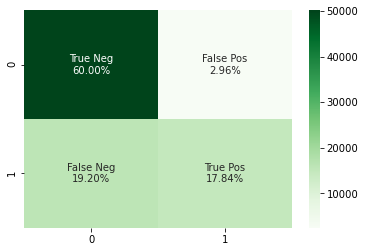

In [44]:
Confusion_MatrixForLogReg = confusion_matrix(y_train,y_train_pred)

names_on_cm = ["True Neg","False Pos","False Neg","True Pos"]
names_percentages = ["{0:.2%}".format(value_data) for value_data in
                     Confusion_MatrixForLogReg.flatten()/np.sum(Confusion_MatrixForLogReg)]
labels = [f"{v1}\n{v3}" for v1, v3 in
          zip(names_on_cm,names_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(Confusion_MatrixForLogReg, annot=labels, fmt="", cmap='Greens')

In [45]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84     52616
           1       0.86      0.48      0.62     30957

    accuracy                           0.78     83573
   macro avg       0.81      0.72      0.73     83573
weighted avg       0.79      0.78      0.76     83573



In [46]:
#Data Frame Creation for Accuracy , Precision and Recall
Confusion_MatrixData = confusion_matrix(y_train,y_train_pred)

Accuracy = (Confusion_MatrixData[1][0] + Confusion_MatrixData[0][0])/(Confusion_MatrixData[0][0] + Confusion_MatrixData[0][1] + Confusion_MatrixData[1][0]+ Confusion_MatrixData[1][1])
Senstivity = (Confusion_MatrixData[1][1]) /  (Confusion_MatrixData[1][1] + Confusion_MatrixData[1][0])
Precision = (Confusion_MatrixData[1][1]) / (Confusion_MatrixData[1][1] + (Confusion_MatrixData[0][1])) 

Performance_Metric_LR = pd.DataFrame({"Model": ["Logistics Regression(Train)"],"Accuracy" : [Accuracy],"Senstivity":[Senstivity],"Precision":[Precision]})
Performance_Metric_LR

,Model,Accuracy,Senstivity,Precision
0,Logistics Regression(Train),0.792014,0.481636,0.857784


AUC: 0.717


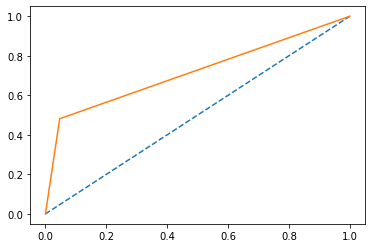

In [47]:
probs = y_train_pred
# keep probabilities for the positive outcome only
probs = probs
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


# Test Data Set Check for Logistics Regression

In [48]:
Observed = y_test
Predicted = LogReg.predict(X_test)

mse = np.mean((Observed-Predicted)**2)
print("The Mean Squared Error is:",mse)
rmse = sqrt(mse)
print("The Root Mean Squared Error is:",rmse)
print("The Mean Absolute Percentage Error is:",mean_absolute_percentage_error(Observed,Predicted))
Log_RegDf_test = pd.DataFrame({"Model": "Logistic Regression(Test)","Mean Squared Error":[mse],"Root Mean Squared Error": [rmse],"Mean Absolute Percentage Error":[mean_absolute_percentage_error(Observed,Predicted)]})
Log_RegDf_test 

The Mean Squared Error is: 0.22252003238685542
The Root Mean Squared Error is: 0.4717202904125022
The Mean Absolute Percentage Error is: 137810123449704.61


,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Logistic Regression(Test),0.22252,0.47172,1.378101e+14


In [49]:
#prediction data for test data set
y_test_pred = LogReg.predict(X_test)

<AxesSubplot:>

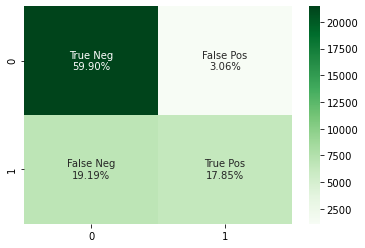

In [50]:
Confusion_MatrixForLogReg = confusion_matrix(y_test,y_test_pred)

names_on_cm = ["True Neg","False Pos","False Neg","True Pos"]
names_percentages = ["{0:.2%}".format(value_data) for value_data in
                     Confusion_MatrixForLogReg.flatten()/np.sum(Confusion_MatrixForLogReg)]
labels = [f"{v1}\n{v3}" for v1, v3 in
          zip(names_on_cm,names_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(Confusion_MatrixForLogReg, annot=labels, fmt="", cmap='Greens')

In [51]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84     22550
           1       0.85      0.48      0.62     13267

    accuracy                           0.78     35817
   macro avg       0.81      0.72      0.73     35817
weighted avg       0.79      0.78      0.76     35817



In [52]:
#Data Frame Creation for Accuracy , Precision and Recall
Confusion_MatrixData = confusion_matrix(y_test,y_test_pred)

Accuracy = (Confusion_MatrixData[1][0] + Confusion_MatrixData[0][0])/(Confusion_MatrixData[0][0] + Confusion_MatrixData[0][1] + Confusion_MatrixData[1][0]+ Confusion_MatrixData[1][1])
Senstivity = (Confusion_MatrixData[1][1]) /  (Confusion_MatrixData[1][1] + Confusion_MatrixData[1][0])
Precision = (Confusion_MatrixData[1][1]) / (Confusion_MatrixData[1][1] + (Confusion_MatrixData[0][1])) 

Performance_Metric_LR_Test = pd.DataFrame({"Model": ["Logistics Regression(Test)"],"Accuracy" : [Accuracy],"Senstivity":[Senstivity],"Precision":[Precision]})
Performance_Metric_LR_Test

,Model,Accuracy,Senstivity,Precision
0,Logistics Regression(Test),0.790909,0.481872,0.853652


AUC: 0.717


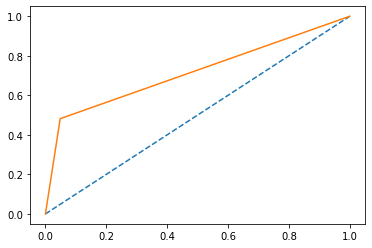

In [53]:
probs = y_test_pred
# keep probabilities for the positive outcome only
probs = probs
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);


In [54]:
probs[::1]

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

# Starting With Linear Discriminant Analysis

In [55]:
LDA = LinearDiscriminantAnalysis()

In [56]:
LDA.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [57]:
LDA.score(X_train, y_train)

0.7586780419513479

# Train Data Set Check for Linear Discriminant Analysis

In [58]:
Observed = y_train
Predicted = LDA.predict(X_train)

mse = np.mean((Observed-Predicted)**2)
print("The Mean Squared Error is:",mse)
rmse = sqrt(mse)
print("The Root Mean Squared Error is:",rmse)
print("The Mean Absolute Percentage Error is:",mean_absolute_percentage_error(Observed,Predicted))
LDA_train = pd.DataFrame({"Model": "Linear Discriminant Analysis(Train)","Mean Squared Error":[mse],"Root Mean Squared Error": [rmse],"Mean Absolute Percentage Error":[mean_absolute_percentage_error(Observed,Predicted)]})
LDA_train

The Mean Squared Error is: 0.24132195804865209
The Root Mean Squared Error is: 0.4912453135131694
The Mean Absolute Percentage Error is: 43703340765528.25


,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Linear Discriminant Analysis(Train),0.241322,0.491245,4.370334e+13


In [59]:
#prediction data for Train data set
y_train_pred_LR = LDA.predict(X_train)

<AxesSubplot:>

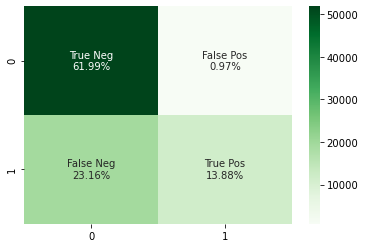

In [60]:
Confusion_MatrixForLogReg = confusion_matrix(y_train,y_train_pred_LR)

names_on_cm = ["True Neg","False Pos","False Neg","True Pos"]
names_percentages = ["{0:.2%}".format(value_data) for value_data in
                     Confusion_MatrixForLogReg.flatten()/np.sum(Confusion_MatrixForLogReg)]
labels = [f"{v1}\n{v3}" for v1, v3 in
          zip(names_on_cm,names_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(Confusion_MatrixForLogReg, annot=labels, fmt="", cmap='Greens')

In [61]:
print(classification_report(y_train,y_train_pred_LR))

              precision    recall  f1-score   support

           0       0.73      0.98      0.84     52616
           1       0.93      0.37      0.53     30957

    accuracy                           0.76     83573
   macro avg       0.83      0.68      0.69     83573
weighted avg       0.80      0.76      0.73     83573



In [62]:
#Data Frame Creation for Accuracy , Precision and Recall
Confusion_MatrixData = confusion_matrix(y_train,y_train_pred_LR)

Accuracy = (Confusion_MatrixData[1][0] + Confusion_MatrixData[0][0])/(Confusion_MatrixData[0][0] + Confusion_MatrixData[0][1] + Confusion_MatrixData[1][0]+ Confusion_MatrixData[1][1])
Senstivity = (Confusion_MatrixData[1][1]) /  (Confusion_MatrixData[1][1] + Confusion_MatrixData[1][0])
Precision = (Confusion_MatrixData[1][1]) / (Confusion_MatrixData[1][1] + (Confusion_MatrixData[0][1])) 

Performance_Metric_LDA = pd.DataFrame({"Model": ["Linear Discriminant Analysis(Train)"],"Accuracy" : [Accuracy],"Senstivity":[Senstivity],"Precision":[Precision]})
Performance_Metric_LDA

,Model,Accuracy,Senstivity,Precision
0,Linear Discriminant Analysis(Train),0.851495,0.374713,0.934655


AUC: 0.680


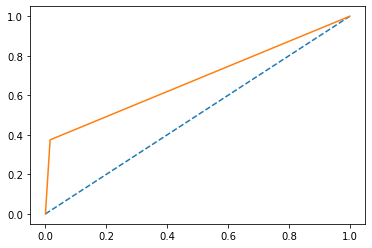

In [63]:
probs = y_train_pred_LR
# keep probabilities for the positive outcome only
probs = probs
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


# Test Data Set Check for Linear Discriminant Analysis

In [64]:
LDA.score(X_test, y_test)

0.7582153725884356

In [65]:
Observed = y_test
Predicted = LDA.predict(X_test)

mse = np.mean((Observed-Predicted)**2)
print("The Mean Squared Error is:",mse)
rmse = sqrt(mse)
print("The Root Mean Squared Error is:",rmse)
print("The Mean Absolute Percentage Error is:",mean_absolute_percentage_error(Observed,Predicted))
LDA_test = pd.DataFrame({"Model": "Linear Discriminant Analysis(Test)","Mean Squared Error":[mse],"Root Mean Squared Error": [rmse],"Mean Absolute Percentage Error":[mean_absolute_percentage_error(Observed,Predicted)]})
LDA_test

The Mean Squared Error is: 0.24178462741156434
The Root Mean Squared Error is: 0.4917160028019877
The Mean Absolute Percentage Error is: 46900708071843.08


,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Linear Discriminant Analysis(Test),0.241785,0.491716,4.690071e+13


In [66]:
#prediction data for test data set
y_test_pred_LR = LDA.predict(X_test)

<AxesSubplot:>

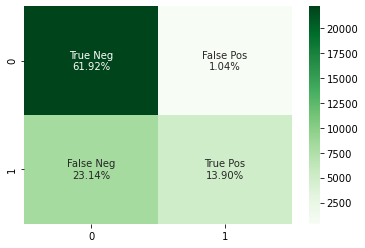

In [67]:
Confusion_MatrixForLogReg = confusion_matrix(y_test,y_test_pred_LR)

names_on_cm = ["True Neg","False Pos","False Neg","True Pos"]
names_percentages = ["{0:.2%}".format(value_data) for value_data in
                     Confusion_MatrixForLogReg.flatten()/np.sum(Confusion_MatrixForLogReg)]
labels = [f"{v1}\n{v3}" for v1, v3 in
          zip(names_on_cm,names_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(Confusion_MatrixForLogReg, annot=labels, fmt="", cmap='Greens')

In [68]:
print(classification_report(y_test,y_test_pred_LR))

              precision    recall  f1-score   support

           0       0.73      0.98      0.84     22550
           1       0.93      0.38      0.53     13267

    accuracy                           0.76     35817
   macro avg       0.83      0.68      0.69     35817
weighted avg       0.80      0.76      0.72     35817



In [69]:
#Data Frame Creation for Accuracy , Precision and Recall
Confusion_MatrixData = confusion_matrix(y_test,y_test_pred_LR)

Accuracy = (Confusion_MatrixData[1][0] + Confusion_MatrixData[0][0])/(Confusion_MatrixData[0][0] + Confusion_MatrixData[0][1] + Confusion_MatrixData[1][0]+ Confusion_MatrixData[1][1])
Senstivity = (Confusion_MatrixData[1][1]) /  (Confusion_MatrixData[1][1] + Confusion_MatrixData[1][0])
Precision = (Confusion_MatrixData[1][1]) / (Confusion_MatrixData[1][1] + (Confusion_MatrixData[0][1])) 

Performance_Metric_LDA_test = pd.DataFrame({"Model": ["Linear Discriminant Analysis(Test)"],"Accuracy" : [Accuracy],"Senstivity":[Senstivity],"Precision":[Precision]})
Performance_Metric_LDA_test

,Model,Accuracy,Senstivity,Precision
0,Linear Discriminant Analysis(Test),0.850546,0.375367,0.930319


AUC: 0.679


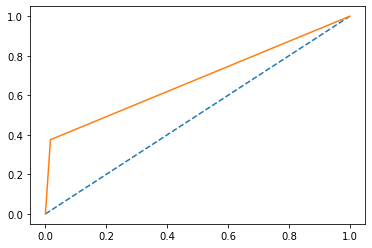

In [70]:
probs = y_test_pred_LR
# keep probabilities for the positive outcome only
probs = probs
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [71]:
#Combining the data frame in Logistics and Linear Discrimant Analysis
Linear_Log_Df = pd.concat([Log_RegDf,Log_RegDf_test,LDA_train,LDA_test],axis =0)
Linear_Log_Df

,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Logistic Regression(Train),0.221591,0.470734,1.332117e+14
0,Logistic Regression(Test),0.222520,0.471720,1.378101e+14
0,Linear Discriminant Analysis(Train),0.241322,0.491245,4.370334e+13
0,Linear Discriminant Analysis(Test),0.241785,0.491716,4.690071e+13


Classification Models 

# Start Of Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
Rfcl = RandomForestClassifier()

In [75]:
param_grid = {
    "max_depth" : [7,10],
    "max_features":[4,6],
    "min_samples_leaf":[50,100],
    "min_samples_split":[150,300],
    "n_estimators":[301,501]
}

In [76]:
#grid_search = GridSearchCV(estimator=Rfcl , param_grid=param_grid , cv = 3)

In [77]:
#grid_search.fit(X_train , y_train)

In [78]:
#grid_search.best_params_

In [79]:
Rfcl = RandomForestClassifier(n_estimators=501,min_samples_leaf=50,min_samples_split=150,max_depth=10,max_features=6)
Rfcl.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=50,
                       min_samples_split=150, n_estimators=501)

# Train Data Set Check for Random Forest Classifier

In [80]:
Observed = y_train
Predicted = Rfcl.predict(X_train)

mse = np.mean((Observed-Predicted)**2)
print("The Mean Squared Error is:",mse)
rmse = sqrt(mse)
print("The Root Mean Squared Error is:",rmse)
print("The Mean Absolute Percentage Error is:",mean_absolute_percentage_error(Observed,Predicted))
Rfcl_train = pd.DataFrame({"Model": "Random Forest Classifier(Train)","Mean Squared Error":[mse],"Root Mean Squared Error": [rmse],"Mean Absolute Percentage Error":[mean_absolute_percentage_error(Observed,Predicted)]})
Rfcl_train

The Mean Squared Error is: 0.1917844279851148
The Root Mean Squared Error is: 0.4379319901367275
The Mean Absolute Percentage Error is: 189578733431723.3


,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Random Forest Classifier(Train),0.191784,0.437932,1.895787e+14


In [81]:
#prediction data for Train data set
y_train_pred_LR = Rfcl.predict(X_train)

<AxesSubplot:>

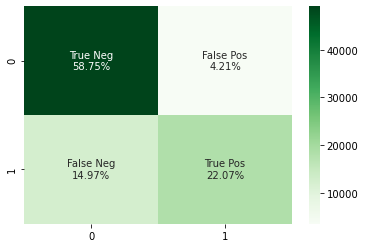

In [82]:
Confusion_MatrixForLogReg = confusion_matrix(y_train,y_train_pred_LR)

names_on_cm = ["True Neg","False Pos","False Neg","True Pos"]
names_percentages = ["{0:.2%}".format(value_data) for value_data in
                     Confusion_MatrixForLogReg.flatten()/np.sum(Confusion_MatrixForLogReg)]
labels = [f"{v1}\n{v3}" for v1, v3 in
          zip(names_on_cm,names_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(Confusion_MatrixForLogReg, annot=labels, fmt="", cmap='Greens')

In [83]:
print(classification_report(y_train,y_train_pred_LR))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     52616
           1       0.84      0.60      0.70     30957

    accuracy                           0.81     83573
   macro avg       0.82      0.76      0.78     83573
weighted avg       0.81      0.81      0.80     83573



In [84]:
#Data Frame Creation for Accuracy , Precision and Recall
Confusion_MatrixData = confusion_matrix(y_train,y_train_pred_LR)

Accuracy = (Confusion_MatrixData[1][0] + Confusion_MatrixData[0][0])/(Confusion_MatrixData[0][0] + Confusion_MatrixData[0][1] + Confusion_MatrixData[1][0]+ Confusion_MatrixData[1][1])
Senstivity = (Confusion_MatrixData[1][1]) /  (Confusion_MatrixData[1][1] + Confusion_MatrixData[1][0])
Precision = (Confusion_MatrixData[1][1]) / (Confusion_MatrixData[1][1] + (Confusion_MatrixData[0][1])) 

Performance_Metric_RFCL = pd.DataFrame({"Model": ["Random Forest Classifier(Train)"],"Accuracy" : [Accuracy],"Senstivity":[Senstivity],"Precision":[Precision]})
Performance_Metric_RFCL

,Model,Accuracy,Senstivity,Precision
0,Random Forest Classifier(Train),0.737176,0.595891,0.839836


AUC: 0.765


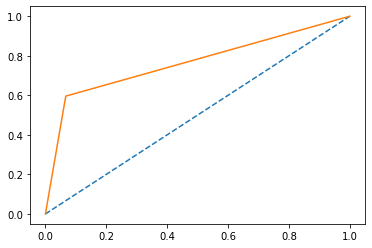

In [85]:
probs = y_train_pred_LR
# keep probabilities for the positive outcome only
probs = probs
# calculate AUC
traun_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % traun_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# Test Data Set Check for Random Forest Classifier

In [86]:
Observed = y_test
Predicted = Rfcl.predict(X_test)

mse = np.mean((Observed-Predicted)**2)
print("The Mean Squared Error is:",mse)
rmse = sqrt(mse)
print("The Root Mean Squared Error is:",rmse)
print("The Mean Absolute Percentage Error is:",mean_absolute_percentage_error(Observed,Predicted))
Rfcl_test = pd.DataFrame({"Model": "Random Forest Classifier(Test)","Mean Squared Error":[mse],"Root Mean Squared Error": [rmse],"Mean Absolute Percentage Error":[mean_absolute_percentage_error(Observed,Predicted)]})
Rfcl_test

The Mean Squared Error is: 0.1921154758913365
The Root Mean Squared Error is: 0.43830979442779566
The Mean Absolute Percentage Error is: 195524399602454.84


,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Random Forest Classifier(Test),0.192115,0.43831,1.955244e+14


In [87]:
#prediction data for test data set
y_test_pred_LR = Rfcl.predict(X_test)

<AxesSubplot:>

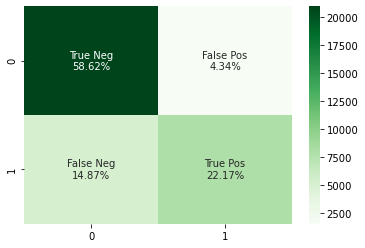

In [88]:
Confusion_MatrixForLogReg = confusion_matrix(y_test,y_test_pred_LR)

names_on_cm = ["True Neg","False Pos","False Neg","True Pos"]
names_percentages = ["{0:.2%}".format(value_data) for value_data in
                     Confusion_MatrixForLogReg.flatten()/np.sum(Confusion_MatrixForLogReg)]
labels = [f"{v1}\n{v3}" for v1, v3 in
          zip(names_on_cm,names_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(Confusion_MatrixForLogReg, annot=labels, fmt="", cmap='Greens')

In [89]:
print(classification_report(y_test,y_test_pred_LR))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     22550
           1       0.84      0.60      0.70     13267

    accuracy                           0.81     35817
   macro avg       0.82      0.76      0.78     35817
weighted avg       0.81      0.81      0.80     35817



In [90]:
#Data Frame Creation for Accuracy , Precision and Recall
Confusion_MatrixData = confusion_matrix(y_test,y_test_pred_LR)

Accuracy = (Confusion_MatrixData[1][0] + Confusion_MatrixData[0][0])/(Confusion_MatrixData[0][0] + Confusion_MatrixData[0][1] + Confusion_MatrixData[1][0]+ Confusion_MatrixData[1][1])
Senstivity = (Confusion_MatrixData[1][1]) /  (Confusion_MatrixData[1][1] + Confusion_MatrixData[1][0])
Precision = (Confusion_MatrixData[1][1]) / (Confusion_MatrixData[1][1] + (Confusion_MatrixData[0][1])) 

Performance_Metric_RFCL_test = pd.DataFrame({"Model": ["Random Forest Classifier(Test)"],"Accuracy" : [Accuracy],"Senstivity":[Senstivity],"Precision":[Precision]})
Performance_Metric_RFCL_test

,Model,Accuracy,Senstivity,Precision
0,Random Forest Classifier(Test),0.734875,0.598553,0.836247


AUC: 0.765


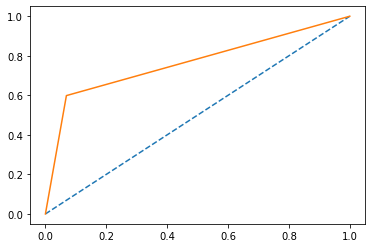

In [91]:
probs = y_test_pred_LR
# keep probabilities for the positive outcome only
probs = probs
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# Starting of Decision Tree Classifier

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
DT = DecisionTreeClassifier(criterion="gini",max_depth=13,min_samples_leaf=40,min_samples_split=20)
#DT = DecisionTreeClassifier(criterion="gini")
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=13, min_samples_leaf=40, min_samples_split=20)

In [94]:
from sklearn import tree

In [95]:
#train_char_labels = ["No" , "Yes"]
#Insurance_File = open("C:/Users/Vidhut Sharma/Documents/DataForPractice/Cap2.dot",mode = "w")
#dot_data = tree.export_graphviz(DT , out_file= Insurance_File , feature_names= list(X_train) , class_names=train_char_labels)

# Train Data Set Check for Decision Tree Classifier

In [96]:
Observed = y_train
Predicted = DT.predict(X_train)

mse = np.mean((Observed-Predicted)**2)
print("The Mean Squared Error is:",mse)
rmse = sqrt(mse)
print("The Root Mean Squared Error is:",rmse)
print("The Mean Absolute Percentage Error is:",mean_absolute_percentage_error(Observed,Predicted))
DT_train = pd.DataFrame({"Model": "Decision Tree Classifier(Train)","Mean Squared Error":[mse],"Root Mean Squared Error": [rmse],"Mean Absolute Percentage Error":[mean_absolute_percentage_error(Observed,Predicted)]})
DT_train

The Mean Squared Error is: 0.1872494705227765
The Root Mean Squared Error is: 0.4327233186723088
The Mean Absolute Percentage Error is: 207954614074195.62


,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Decision Tree Classifier(Train),0.187249,0.432723,2.079546e+14


In [97]:
#prediction data for Train data set
y_train_pred_LR = DT.predict(X_train)

<AxesSubplot:>

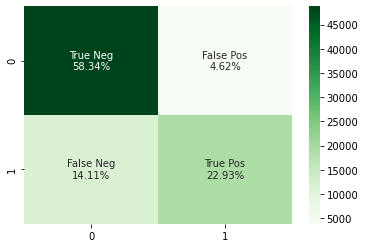

In [98]:
Confusion_MatrixForLogReg = confusion_matrix(y_train,y_train_pred_LR)

names_on_cm = ["True Neg","False Pos","False Neg","True Pos"]
names_percentages = ["{0:.2%}".format(value_data) for value_data in
                     Confusion_MatrixForLogReg.flatten()/np.sum(Confusion_MatrixForLogReg)]
labels = [f"{v1}\n{v3}" for v1, v3 in
          zip(names_on_cm,names_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(Confusion_MatrixForLogReg, annot=labels, fmt="", cmap='Greens')

In [99]:
print(classification_report(y_train,y_train_pred_LR))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86     52616
           1       0.83      0.62      0.71     30957

    accuracy                           0.81     83573
   macro avg       0.82      0.77      0.79     83573
weighted avg       0.82      0.81      0.81     83573



In [100]:
#Data Frame Creation for Accuracy , Precision and Recall
Confusion_MatrixData = confusion_matrix(y_train,y_train_pred_LR)

Accuracy = (Confusion_MatrixData[1][0] + Confusion_MatrixData[0][0])/(Confusion_MatrixData[0][0] + Confusion_MatrixData[0][1] + Confusion_MatrixData[1][0]+ Confusion_MatrixData[1][1])
Senstivity = (Confusion_MatrixData[1][1]) /  (Confusion_MatrixData[1][1] + Confusion_MatrixData[1][0])
Precision = (Confusion_MatrixData[1][1]) / (Confusion_MatrixData[1][1] + (Confusion_MatrixData[0][1])) 

Performance_Metric_DT = pd.DataFrame({"Model": ["Decision Tree Classifier(Train)"],"Accuracy" : [Accuracy],"Senstivity":[Senstivity],"Precision":[Precision]})
Performance_Metric_DT

,Model,Accuracy,Senstivity,Precision
0,Decision Tree Classifier(Train),0.72448,0.619149,0.832407


AUC: 0.773


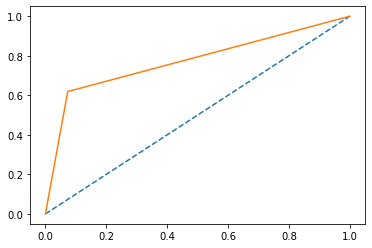

In [101]:
probs = y_train_pred_LR
# keep probabilities for the positive outcome only
probs = probs
# calculate AUC
traun_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % traun_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# Test Data Set Check for Decision Tree Classifier

In [102]:
Observed = y_test
Predicted = DT.predict(X_test)

mse = np.mean((Observed-Predicted)**2)
print("The Mean Squared Error is:",mse)
rmse = sqrt(mse)
print("The Root Mean Squared Error is:",rmse)
print("The Mean Absolute Percentage Error is:",mean_absolute_percentage_error(Observed,Predicted))
DT_test = pd.DataFrame({"Model": "Decision Tree Classifier(Test)","Mean Squared Error":[mse],"Root Mean Squared Error": [rmse],"Mean Absolute Percentage Error":[mean_absolute_percentage_error(Observed,Predicted)]})
DT_test

The Mean Squared Error is: 0.19180835915905856
The Root Mean Squared Error is: 0.43795931221867923
The Mean Absolute Percentage Error is: 221426667331140.2


,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Decision Tree Classifier(Test),0.191808,0.437959,2.214267e+14


In [103]:
#prediction data for test data set
y_test_pred_LR = DT.predict(X_test)

<AxesSubplot:>

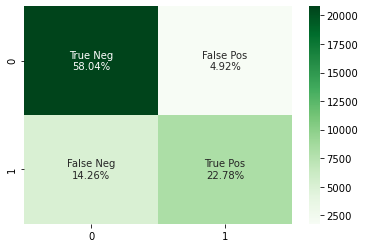

In [104]:
Confusion_MatrixForLogReg = confusion_matrix(y_test,y_test_pred_LR)

names_on_cm = ["True Neg","False Pos","False Neg","True Pos"]
names_percentages = ["{0:.2%}".format(value_data) for value_data in
                     Confusion_MatrixForLogReg.flatten()/np.sum(Confusion_MatrixForLogReg)]
labels = [f"{v1}\n{v3}" for v1, v3 in
          zip(names_on_cm,names_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(Confusion_MatrixForLogReg, annot=labels, fmt="", cmap='Greens')

In [105]:
print(classification_report(y_test,y_test_pred_LR))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86     22550
           1       0.82      0.61      0.70     13267

    accuracy                           0.81     35817
   macro avg       0.81      0.77      0.78     35817
weighted avg       0.81      0.81      0.80     35817



In [106]:
#Data Frame Creation for Accuracy , Precision and Recall
Confusion_MatrixData = confusion_matrix(y_test,y_test_pred_LR)

Accuracy = (Confusion_MatrixData[1][0] + Confusion_MatrixData[0][0])/(Confusion_MatrixData[0][0] + Confusion_MatrixData[0][1] + Confusion_MatrixData[1][0]+ Confusion_MatrixData[1][1])
Senstivity = (Confusion_MatrixData[1][1]) /  (Confusion_MatrixData[1][1] + Confusion_MatrixData[1][0])
Precision = (Confusion_MatrixData[1][1]) / (Confusion_MatrixData[1][1] + (Confusion_MatrixData[0][1])) 

Performance_Metric_DT_test = pd.DataFrame({"Model": ["Decision Tree Classifier(Test)"],"Accuracy" : [Accuracy],"Senstivity":[Senstivity],"Precision":[Precision]})
Performance_Metric_DT_test

,Model,Accuracy,Senstivity,Precision
0,Decision Tree Classifier(Test),0.723064,0.614909,0.822462


AUC: 0.768


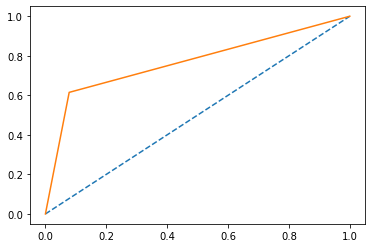

In [107]:
probs = y_test_pred_LR
# keep probabilities for the positive outcome only
probs = probs
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# Starting of MLP Classifier

In [108]:
from sklearn.neural_network import MLPClassifier

In [109]:
MLP = MLPClassifier()
MLP.fit(X_train,y_train)

MLPClassifier()

# Train Data Set Check for MLP Classifier

In [110]:
Observed = y_train
Predicted = MLP.predict(X_train)

mse = np.mean((Observed-Predicted)**2)
print("The Mean Squared Error is:",mse)
rmse = sqrt(mse)
print("The Root Mean Squared Error is:",rmse)
print("The Mean Absolute Percentage Error is:",mean_absolute_percentage_error(Observed,Predicted))
MLP_train = pd.DataFrame({"Model": "MLP Classifier(Train)","Mean Squared Error":[mse],"Root Mean Squared Error": [rmse],"Mean Absolute Percentage Error":[mean_absolute_percentage_error(Observed,Predicted)]})
MLP_train

The Mean Squared Error is: 0.18206837136395726
The Root Mean Squared Error is: 0.42669470510419655
The Mean Absolute Percentage Error is: 177884991204695.47


,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,MLP Classifier(Train),0.182068,0.426695,1.778850e+14


In [111]:
#prediction data for Train data set
y_train_pred_LR = MLP.predict(X_train)

<AxesSubplot:>

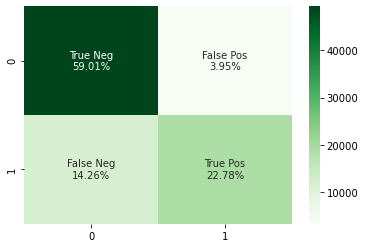

In [112]:
Confusion_MatrixForLogReg = confusion_matrix(y_train,y_train_pred_LR)

names_on_cm = ["True Neg","False Pos","False Neg","True Pos"]
names_percentages = ["{0:.2%}".format(value_data) for value_data in
                     Confusion_MatrixForLogReg.flatten()/np.sum(Confusion_MatrixForLogReg)]
labels = [f"{v1}\n{v3}" for v1, v3 in
          zip(names_on_cm,names_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(Confusion_MatrixForLogReg, annot=labels, fmt="", cmap='Greens')

In [113]:
print(classification_report(y_train,y_train_pred_LR))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87     52616
           1       0.85      0.62      0.71     30957

    accuracy                           0.82     83573
   macro avg       0.83      0.78      0.79     83573
weighted avg       0.82      0.82      0.81     83573



In [114]:
#Data Frame Creation for Accuracy , Precision and Recall
Confusion_MatrixData = confusion_matrix(y_train,y_train_pred_LR)

Accuracy = (Confusion_MatrixData[1][0] + Confusion_MatrixData[0][0])/(Confusion_MatrixData[0][0] + Confusion_MatrixData[0][1] + Confusion_MatrixData[1][0]+ Confusion_MatrixData[1][1])
Senstivity = (Confusion_MatrixData[1][1]) /  (Confusion_MatrixData[1][1] + Confusion_MatrixData[1][0])
Precision = (Confusion_MatrixData[1][1]) / (Confusion_MatrixData[1][1] + (Confusion_MatrixData[0][1])) 

Performance_Metric_MLP = pd.DataFrame({"Model": ["MLP Classifier(Train)"],"Accuracy" : [Accuracy],"Senstivity":[Senstivity],"Precision":[Precision]})
Performance_Metric_MLP

,Model,Accuracy,Senstivity,Precision
0,MLP Classifier(Train),0.732653,0.615111,0.852258


AUC: 0.776


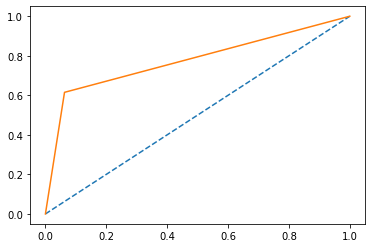

In [115]:
probs = y_train_pred_LR
# keep probabilities for the positive outcome only
probs = probs
# calculate AUC
traun_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % traun_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# Test Data Set Check for MLP Classifier

In [116]:
Observed = y_test
Predicted = MLP.predict(X_test)

mse = np.mean((Observed-Predicted)**2)
print("The Mean Squared Error is:",mse)
rmse = sqrt(mse)
print("The Root Mean Squared Error is:",rmse)
print("The Mean Absolute Percentage Error is:",mean_absolute_percentage_error(Observed,Predicted))
MLP_test = pd.DataFrame({"Model": "MLP Classifier(Test)","Mean Squared Error":[mse],"Root Mean Squared Error": [rmse],"Mean Absolute Percentage Error":[mean_absolute_percentage_error(Observed,Predicted)]})
MLP_test

The Mean Squared Error is: 0.18602898065164586
The Root Mean Squared Error is: 0.4313107703867895
The Mean Absolute Percentage Error is: 189488919743343.72


,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,MLP Classifier(Test),0.186029,0.431311,1.894889e+14


In [117]:
#prediction data for test data set
y_test_pred_LR = MLP.predict(X_test)

<AxesSubplot:>

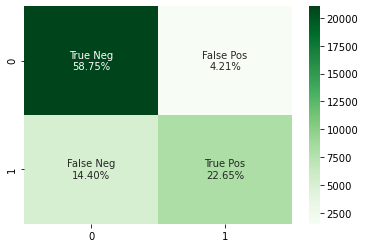

In [118]:
Confusion_MatrixForLogReg = confusion_matrix(y_test,y_test_pred_LR)

names_on_cm = ["True Neg","False Pos","False Neg","True Pos"]
names_percentages = ["{0:.2%}".format(value_data) for value_data in
                     Confusion_MatrixForLogReg.flatten()/np.sum(Confusion_MatrixForLogReg)]
labels = [f"{v1}\n{v3}" for v1, v3 in
          zip(names_on_cm,names_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(Confusion_MatrixForLogReg, annot=labels, fmt="", cmap='Greens')

In [119]:
print(classification_report(y_test,y_test_pred_LR))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     22550
           1       0.84      0.61      0.71     13267

    accuracy                           0.81     35817
   macro avg       0.82      0.77      0.79     35817
weighted avg       0.82      0.81      0.81     35817



In [120]:
#Data Frame Creation for Accuracy , Precision and Recall
Confusion_MatrixData = confusion_matrix(y_test,y_test_pred_LR)

Accuracy = (Confusion_MatrixData[1][0] + Confusion_MatrixData[0][0])/(Confusion_MatrixData[0][0] + Confusion_MatrixData[0][1] + Confusion_MatrixData[1][0]+ Confusion_MatrixData[1][1])
Senstivity = (Confusion_MatrixData[1][1]) /  (Confusion_MatrixData[1][1] + Confusion_MatrixData[1][0])
Precision = (Confusion_MatrixData[1][1]) / (Confusion_MatrixData[1][1] + (Confusion_MatrixData[0][1])) 

Performance_Metric_MLP_test = pd.DataFrame({"Model": ["MLP Classifier(Test)"],"Accuracy" : [Accuracy],"Senstivity":[Senstivity],"Precision":[Precision]})
Performance_Metric_MLP_test

,Model,Accuracy,Senstivity,Precision
0,MLP Classifier(Test),0.731468,0.611367,0.843315


AUC: 0.772


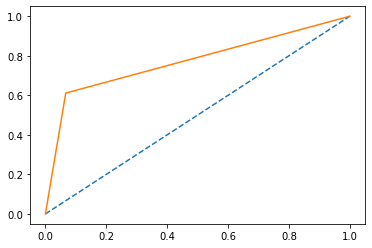

In [121]:
probs = y_test_pred_LR
# keep probabilities for the positive outcome only
probs = probs
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# Starting of AdaBoost Classifier

In [122]:
from sklearn.ensemble import AdaBoostClassifier

In [123]:
ABC = AdaBoostClassifier()
ABC.fit(X_train,y_train)

AdaBoostClassifier()

# Train Data Set Check for AdaBoost Classifier

In [124]:
Observed = y_train
Predicted = ABC.predict(X_train)

mse = np.mean((Observed-Predicted)**2)
print("The Mean Squared Error is:",mse)
rmse = sqrt(mse)
print("The Root Mean Squared Error is:",rmse)
print("The Mean Absolute Percentage Error is:",mean_absolute_percentage_error(Observed,Predicted))
ABC_train = pd.DataFrame({"Model": "Ada Boost Classifier(Train)","Mean Squared Error":[mse],"Root Mean Squared Error": [rmse],"Mean Absolute Percentage Error":[mean_absolute_percentage_error(Observed,Predicted)]})
ABC_train

The Mean Squared Error is: 0.19304081461716105
The Root Mean Squared Error is: 0.43936410255864217
The Mean Absolute Percentage Error is: 203589668818945.62


,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Ada Boost Classifier(Train),0.193041,0.439364,2.035897e+14


In [125]:
#prediction data for Train data set
y_train_pred_LR = ABC.predict(X_train)

<AxesSubplot:>

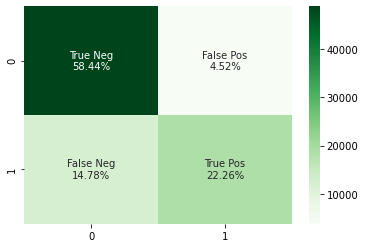

In [126]:
Confusion_MatrixForLogReg = confusion_matrix(y_train,y_train_pred_LR)

names_on_cm = ["True Neg","False Pos","False Neg","True Pos"]
names_percentages = ["{0:.2%}".format(value_data) for value_data in
                     Confusion_MatrixForLogReg.flatten()/np.sum(Confusion_MatrixForLogReg)]
labels = [f"{v1}\n{v3}" for v1, v3 in
          zip(names_on_cm,names_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(Confusion_MatrixForLogReg, annot=labels, fmt="", cmap='Greens')

In [127]:
print(classification_report(y_train,y_train_pred_LR))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     52616
           1       0.83      0.60      0.70     30957

    accuracy                           0.81     83573
   macro avg       0.81      0.76      0.78     83573
weighted avg       0.81      0.81      0.80     83573



In [128]:
#Data Frame Creation for Accuracy , Precision and Recall
Confusion_MatrixData = confusion_matrix(y_train,y_train_pred_LR)

Accuracy = (Confusion_MatrixData[1][0] + Confusion_MatrixData[0][0])/(Confusion_MatrixData[0][0] + Confusion_MatrixData[0][1] + Confusion_MatrixData[1][0]+ Confusion_MatrixData[1][1])
Senstivity = (Confusion_MatrixData[1][1]) /  (Confusion_MatrixData[1][1] + Confusion_MatrixData[1][0])
Precision = (Confusion_MatrixData[1][1]) / (Confusion_MatrixData[1][1] + (Confusion_MatrixData[0][1])) 

Performance_Metric_ABC = pd.DataFrame({"Model": ["Ada Boost Classifier(Train)"],"Accuracy" : [Accuracy],"Senstivity":[Senstivity],"Precision":[Precision]})
Performance_Metric_ABC

,Model,Accuracy,Senstivity,Precision
0,Ada Boost Classifier(Train),0.73221,0.600898,0.831189


AUC: 0.765


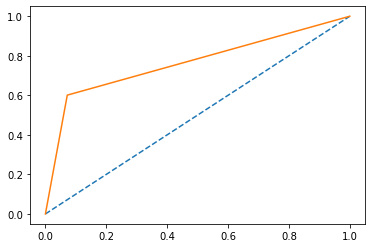

In [129]:
probs = y_train_pred_LR
# keep probabilities for the positive outcome only
probs = probs
# calculate AUC
traun_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % traun_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# Test Data Set Check for AdaBoost Classifier

In [130]:
Observed = y_test
Predicted = ABC.predict(X_test)

mse = np.mean((Observed-Predicted)**2)
print("The Mean Squared Error is:",mse)
rmse = sqrt(mse)
print("The Root Mean Squared Error is:",rmse)
print("The Mean Absolute Percentage Error is:",mean_absolute_percentage_error(Observed,Predicted))
ABC_test = pd.DataFrame({"Model": "Ada Boost Classifier(Test)","Mean Squared Error":[mse],"Root Mean Squared Error": [rmse],"Mean Absolute Percentage Error":[mean_absolute_percentage_error(Observed,Predicted)]})
ABC_test

The Mean Squared Error is: 0.19451657034369155
The Root Mean Squared Error is: 0.4410403273439874
The Mean Absolute Percentage Error is: 212624925869936.44


,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Ada Boost Classifier(Test),0.194517,0.44104,2.126249e+14


In [131]:
#prediction data for test data set
y_test_pred_LR = ABC.predict(X_test)

<AxesSubplot:>

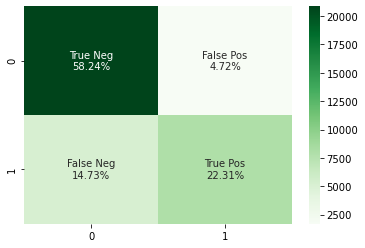

In [132]:
Confusion_MatrixForLogReg = confusion_matrix(y_test,y_test_pred_LR)

names_on_cm = ["True Neg","False Pos","False Neg","True Pos"]
names_percentages = ["{0:.2%}".format(value_data) for value_data in
                     Confusion_MatrixForLogReg.flatten()/np.sum(Confusion_MatrixForLogReg)]
labels = [f"{v1}\n{v3}" for v1, v3 in
          zip(names_on_cm,names_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(Confusion_MatrixForLogReg, annot=labels, fmt="", cmap='Greens')

In [133]:
print(classification_report(y_test,y_test_pred_LR))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     22550
           1       0.83      0.60      0.70     13267

    accuracy                           0.81     35817
   macro avg       0.81      0.76      0.78     35817
weighted avg       0.81      0.81      0.80     35817



In [134]:
#Data Frame Creation for Accuracy , Precision and Recall
Confusion_MatrixData = confusion_matrix(y_test,y_test_pred_LR)

Accuracy = (Confusion_MatrixData[1][0] + Confusion_MatrixData[0][0])/(Confusion_MatrixData[0][0] + Confusion_MatrixData[0][1] + Confusion_MatrixData[1][0]+ Confusion_MatrixData[1][1])
Senstivity = (Confusion_MatrixData[1][1]) /  (Confusion_MatrixData[1][1] + Confusion_MatrixData[1][0])
Precision = (Confusion_MatrixData[1][1]) / (Confusion_MatrixData[1][1] + (Confusion_MatrixData[0][1])) 

Performance_Metric_ABC_test = pd.DataFrame({"Model": ["Ada Boost Classifier(Test)"],"Accuracy" : [Accuracy],"Senstivity":[Senstivity],"Precision":[Precision]})
Performance_Metric_ABC_test

,Model,Accuracy,Senstivity,Precision
0,Ada Boost Classifier(Test),0.729681,0.602322,0.825346


AUC: 0.764


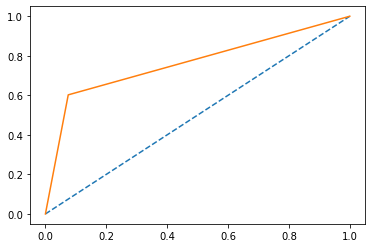

In [135]:
probs = y_test_pred_LR
# keep probabilities for the positive outcome only
probs = probs
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# Performace for all the metric calculated for all the models for train and test data set

In [136]:
Total_MetricDf = pd.concat([Performance_Metric_LR, Performance_Metric_LR_Test, Performance_Metric_LDA, Performance_Metric_LDA_test, Performance_Metric_RFCL, Performance_Metric_RFCL_test, Performance_Metric_DT, Performance_Metric_DT_test, Performance_Metric_MLP, Performance_Metric_MLP_test, Performance_Metric_ABC, Performance_Metric_ABC_test],axis =0)
Metric_Df = pd.concat([Linear_Log_Df, Rfcl_train, Rfcl_test, DT_train, DT_test, MLP_train, MLP_test, ABC_train, ABC_test])
Total_MetricDf = pd.concat([Total_MetricDf,Metric_Df[["Mean Squared Error","Root Mean Squared Error","Mean Absolute Percentage Error"]]],axis =1)
Total_MetricDf
Total_MetricDf.rename({"Senstivity": "Sensitivity"},axis ="columns")
Total_MetricDf.columns = ["Model","Accuracy","Sensitivity","Precision","Mean Squared Error","Root Mean Squared Error","Mean Absolute Percentage Error"]
Total_MetricDf

,Model,Accuracy,Sensitivity,Precision,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Logistics Regression(Train),0.792014,0.481636,0.857784,0.221591,0.470734,1.332117e+14
0,Logistics Regression(Test),0.790909,0.481872,0.853652,0.222520,0.471720,1.378101e+14
0,Linear Discriminant Analysis(Train),0.851495,0.374713,0.934655,0.241322,0.491245,4.370334e+13
0,Linear Discriminant Analysis(Test),0.850546,0.375367,0.930319,0.241785,0.491716,4.690071e+13
0,Random Forest Classifier(Train),0.737176,0.595891,0.839836,0.191784,0.437932,1.895787e+14
0,Random Forest Classifier(Test),0.734875,0.598553,0.836247,0.192115,0.438310,1.955244e+14
0,Decision Tree Classifier(Train),0.724480,0.619149,0.832407,0.187249,0.432723,2.079546e+14
0,Decision Tree Classifier(Test),0.723064,0.614909,0.822462,0.191808,0.437959,2.214267e+14
0,MLP Classifier(Train),0.732653,0.615111,0.852258,0.182068,0.426695,1.778850e+14
0,MLP Classifier(Test),0.731468,0.611367,0.843315,0.186029,0.431311,1.894889e+14


# Using Over Sampling Method SMOTE to make the data kind of less imbalanced 

In [137]:
from imblearn.over_sampling import SMOTE

In [138]:
sm = SMOTE(random_state=33,sampling_strategy=0.75)
X_res,y_res = sm.fit_sample(X_train,y_train)

In [139]:
print(y_res.value_counts())#The Train values after SMOTE is used

print(y_train.value_counts())#Actual Train Values

0    52616
1    39462
Name: is_canceled, dtype: int64
0    52616
1    30957
Name: is_canceled, dtype: int64


# Starting Logistics Regression (SMOTE)

In [140]:
LogReg_SMOTE = LogisticRegression(solver="saga")
LogReg_SMOTE.fit(X_res , y_res)

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(solver='saga')

# Train Data For Logistics Regression(SMOTE)


In [141]:
Observed = y_res
Predicted = LogReg_SMOTE.predict(X_res)

mse = np.mean((Observed-Predicted)**2)
print("The Mean Squared Error is:",mse)
rmse = sqrt(mse)
print("The Root Mean Squared Error is:",rmse)
print("The Mean Absolute Percentage Error is:",mean_absolute_percentage_error(Observed,Predicted))

Log_RegDf_smote = pd.DataFrame({"Model": "Logistic Regression(Train For SMOTE)","Mean Squared Error":[mse],"Root Mean Squared Error": [rmse],"Mean Absolute Percentage Error":[mean_absolute_percentage_error(Observed,Predicted)]})
Log_RegDf_smote

The Mean Squared Error is: 0.2334651056712787
The Root Mean Squared Error is: 0.48318226961601013
The Mean Absolute Percentage Error is: 320071634500233.9


,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Logistic Regression(Train For SMOTE),0.233465,0.483182,3.200716e+14


In [142]:
#prediction data for Train data set
y_train_pred = LogReg_SMOTE.predict(X_res)

<AxesSubplot:>

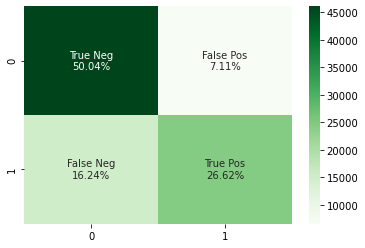

In [143]:
Confusion_MatrixForLogReg = confusion_matrix(y_res,y_train_pred)

names_on_cm = ["True Neg","False Pos","False Neg","True Pos"]
names_percentages = ["{0:.2%}".format(value_data) for value_data in
                     Confusion_MatrixForLogReg.flatten()/np.sum(Confusion_MatrixForLogReg)]
labels = [f"{v1}\n{v3}" for v1, v3 in
          zip(names_on_cm,names_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(Confusion_MatrixForLogReg, annot=labels, fmt="", cmap='Greens')

In [144]:
print(classification_report(y_res,y_train_pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81     52616
           1       0.79      0.62      0.70     39462

    accuracy                           0.77     92078
   macro avg       0.77      0.75      0.75     92078
weighted avg       0.77      0.77      0.76     92078



In [145]:
#Data Frame Creation for Accuracy , Precision and Recall
Confusion_MatrixData = confusion_matrix(y_res,y_train_pred)

Accuracy = (Confusion_MatrixData[1][0] + Confusion_MatrixData[0][0])/(Confusion_MatrixData[0][0] + Confusion_MatrixData[0][1] + Confusion_MatrixData[1][0]+ Confusion_MatrixData[1][1])
Senstivity = (Confusion_MatrixData[1][1]) /  (Confusion_MatrixData[1][1] + Confusion_MatrixData[1][0])
Precision = (Confusion_MatrixData[1][1]) / (Confusion_MatrixData[1][1] + (Confusion_MatrixData[0][1])) 

Performance_Metric_LR_smote = pd.DataFrame({"Model": ["Logistic Regression(Train For SMOTE)"],"Accuracy" : [Accuracy],"Senstivity":[Senstivity],"Precision":[Precision]})
Performance_Metric_LR_smote

,Model,Accuracy,Senstivity,Precision
0,Logistic Regression(Train For SMOTE),0.662753,0.621079,0.789264


AUC: 0.748


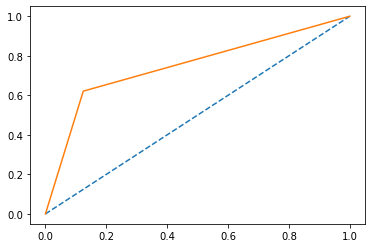

In [146]:
probs = y_train_pred
# keep probabilities for the positive outcome only
probs = probs
# calculate AUC
train_auc = roc_auc_score(y_res, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


# Test Data  for Logistics Regression(SMOTE)

In [147]:
Observed = y_test
Predicted = LogReg_SMOTE.predict(X_test)

mse = np.mean((Observed-Predicted)**2)
print("The Mean Squared Error is:",mse)
rmse = sqrt(mse)
print("The Root Mean Squared Error is:",rmse)
print("The Mean Absolute Percentage Error is:",mean_absolute_percentage_error(Observed,Predicted))

Log_RegDf_smote_tst = pd.DataFrame({"Model": "Logistic Regression(Test For SMOTE)","Mean Squared Error":[mse],"Root Mean Squared Error": [rmse],"Mean Absolute Percentage Error":[mean_absolute_percentage_error(Observed,Predicted)]})
Log_RegDf_smote_tst

The Mean Squared Error is: 0.22009101823156602
The Root Mean Squared Error is: 0.46913859170991895
The Mean Absolute Percentage Error is: 361374356564279.8


,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Logistic Regression(Test For SMOTE),0.220091,0.469139,3.613744e+14


In [148]:
#prediction data for Test data set
y_test_pred = LogReg_SMOTE.predict(X_test)

<AxesSubplot:>

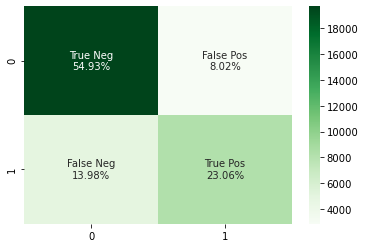

In [149]:
Confusion_MatrixForLogReg = confusion_matrix(y_test,y_test_pred)

names_on_cm = ["True Neg","False Pos","False Neg","True Pos"]
names_percentages = ["{0:.2%}".format(value_data) for value_data in
                     Confusion_MatrixForLogReg.flatten()/np.sum(Confusion_MatrixForLogReg)]
labels = [f"{v1}\n{v3}" for v1, v3 in
          zip(names_on_cm,names_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(Confusion_MatrixForLogReg, annot=labels, fmt="", cmap='Greens')

In [150]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83     22550
           1       0.74      0.62      0.68     13267

    accuracy                           0.78     35817
   macro avg       0.77      0.75      0.76     35817
weighted avg       0.78      0.78      0.78     35817



In [151]:
#Data Frame Creation for Accuracy , Precision and Recall
Confusion_MatrixData = confusion_matrix(y_test,y_test_pred)

Accuracy = (Confusion_MatrixData[1][0] + Confusion_MatrixData[0][0])/(Confusion_MatrixData[0][0] + Confusion_MatrixData[0][1] + Confusion_MatrixData[1][0]+ Confusion_MatrixData[1][1])
Senstivity = (Confusion_MatrixData[1][1]) /  (Confusion_MatrixData[1][1] + Confusion_MatrixData[1][0])
Precision = (Confusion_MatrixData[1][1]) / (Confusion_MatrixData[1][1] + (Confusion_MatrixData[0][1])) 

Performance_Metric_LR_smote_tst = pd.DataFrame({"Model": ["Logistic Regression(Test For SMOTE)"],"Accuracy" : [Accuracy],"Senstivity":[Senstivity],"Precision":[Precision]})
Performance_Metric_LR_smote_tst

,Model,Accuracy,Senstivity,Precision
0,Logistic Regression(Test For SMOTE),0.689198,0.622447,0.741825


AUC: 0.747


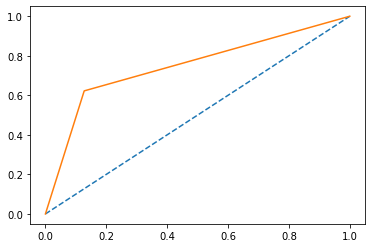

In [152]:
probs = y_test_pred
# keep probabilities for the positive outcome only
probs = probs
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# Starting Linear Discriminant Analysis (SMOTE)

In [153]:
LDA= LinearDiscriminantAnalysis()

In [154]:
LDA.fit(X_res,y_res)

LinearDiscriminantAnalysis()

# Train Data Set Check for Linear Discriminant Analysis

In [155]:
Observed = y_res
Predicted = LDA.predict(X_res)

mse = np.mean((Observed-Predicted)**2)
print("The Mean Squared Error is:",mse)
rmse = sqrt(mse)
print("The Root Mean Squared Error is:",rmse)
print("The Mean Absolute Percentage Error is:",mean_absolute_percentage_error(Observed,Predicted))
LDA_train_smote = pd.DataFrame({"Model": "Linear Discriminant Analysis(Train For SMOTE)","Mean Squared Error":[mse],"Root Mean Squared Error": [rmse],"Mean Absolute Percentage Error":[mean_absolute_percentage_error(Observed,Predicted)]})
LDA_train_smote

The Mean Squared Error is: 0.2525684745541823
The Root Mean Squared Error is: 0.5025619111653631
The Mean Absolute Percentage Error is: 225233783140827.88


,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Linear Discriminant Analysis(Train For SMOTE),0.252568,0.502562,2.252338e+14


In [156]:
#prediction data for Train data set
y_train_pred_LR = LDA.predict(X_res)

<AxesSubplot:>

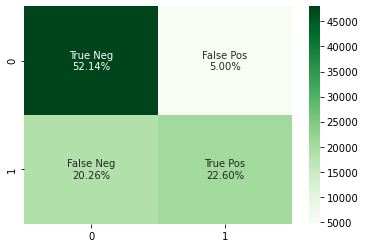

In [157]:
Confusion_MatrixForLogReg = confusion_matrix(y_res,y_train_pred_LR)

names_on_cm = ["True Neg","False Pos","False Neg","True Pos"]
names_percentages = ["{0:.2%}".format(value_data) for value_data in
                     Confusion_MatrixForLogReg.flatten()/np.sum(Confusion_MatrixForLogReg)]
labels = [f"{v1}\n{v3}" for v1, v3 in
          zip(names_on_cm,names_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(Confusion_MatrixForLogReg, annot=labels, fmt="", cmap='Greens')

In [158]:
print(classification_report(y_res,y_train_pred_LR))

              precision    recall  f1-score   support

           0       0.72      0.91      0.81     52616
           1       0.82      0.53      0.64     39462

    accuracy                           0.75     92078
   macro avg       0.77      0.72      0.72     92078
weighted avg       0.76      0.75      0.73     92078



In [159]:
#Data Frame Creation for Accuracy , Precision and Recall
Confusion_MatrixData = confusion_matrix(y_res,y_train_pred_LR)

Accuracy = (Confusion_MatrixData[1][0] + Confusion_MatrixData[0][0])/(Confusion_MatrixData[0][0] + Confusion_MatrixData[0][1] + Confusion_MatrixData[1][0]+ Confusion_MatrixData[1][1])
Senstivity = (Confusion_MatrixData[1][1]) /  (Confusion_MatrixData[1][1] + Confusion_MatrixData[1][0])
Precision = (Confusion_MatrixData[1][1]) / (Confusion_MatrixData[1][1] + (Confusion_MatrixData[0][1])) 

Performance_Metric_LDA_smote = pd.DataFrame({"Model": ["Linear Discriminant Analysis(Train For SMOTE)"],"Accuracy" : [Accuracy],"Senstivity":[Senstivity],"Precision":[Precision]})
Performance_Metric_LDA_smote

,Model,Accuracy,Senstivity,Precision
0,Linear Discriminant Analysis(Train For SMOTE),0.723973,0.527368,0.818815


AUC: 0.720


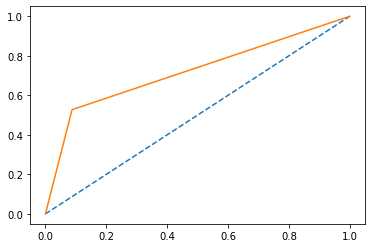

In [160]:
probs = y_train_pred_LR
# keep probabilities for the positive outcome only
probs = probs
# calculate AUC
train_auc = roc_auc_score(y_res, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# Test Data Set Check for Linear Discriminant Analysis

In [161]:
Observed = y_test
Predicted = LDA.predict(X_test)

mse = np.mean((Observed-Predicted)**2)
print("The Mean Squared Error is:",mse)
rmse = sqrt(mse)
print("The Root Mean Squared Error is:",rmse)
print("The Mean Absolute Percentage Error is:",mean_absolute_percentage_error(Observed,Predicted))
LDA_test_smote = pd.DataFrame({"Model": "Linear Discriminant Analysis(Test For SMOTE)","Mean Squared Error":[mse],"Root Mean Squared Error": [rmse],"Mean Absolute Percentage Error":[mean_absolute_percentage_error(Observed,Predicted)]})
LDA_test_smote

The Mean Squared Error is: 0.23204065108747243
The Root Mean Squared Error is: 0.4817059799166629
The Mean Absolute Percentage Error is: 256633633175955.2


,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Linear Discriminant Analysis(Test For SMOTE),0.232041,0.481706,2.566336e+14


In [162]:
#prediction data for test data set
y_test_pred_LR = LDA.predict(X_test)

<AxesSubplot:>

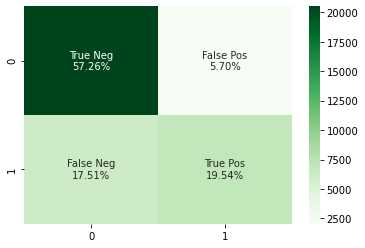

In [163]:
Confusion_MatrixForLogReg = confusion_matrix(y_test,y_test_pred_LR)

names_on_cm = ["True Neg","False Pos","False Neg","True Pos"]
names_percentages = ["{0:.2%}".format(value_data) for value_data in
                     Confusion_MatrixForLogReg.flatten()/np.sum(Confusion_MatrixForLogReg)]
labels = [f"{v1}\n{v3}" for v1, v3 in
          zip(names_on_cm,names_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(Confusion_MatrixForLogReg, annot=labels, fmt="", cmap='Greens')

In [164]:
print(classification_report(y_test,y_test_pred_LR))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83     22550
           1       0.77      0.53      0.63     13267

    accuracy                           0.77     35817
   macro avg       0.77      0.72      0.73     35817
weighted avg       0.77      0.77      0.76     35817



In [165]:
#Data Frame Creation for Accuracy , Precision and Recall
Confusion_MatrixData = confusion_matrix(y_test,y_test_pred_LR)

Accuracy = (Confusion_MatrixData[1][0] + Confusion_MatrixData[0][0])/(Confusion_MatrixData[0][0] + Confusion_MatrixData[0][1] + Confusion_MatrixData[1][0]+ Confusion_MatrixData[1][1])
Senstivity = (Confusion_MatrixData[1][1]) /  (Confusion_MatrixData[1][1] + Confusion_MatrixData[1][0])
Precision = (Confusion_MatrixData[1][1]) / (Confusion_MatrixData[1][1] + (Confusion_MatrixData[0][1])) 

Performance_Metric_LDA_test_smote = pd.DataFrame({"Model": ["Linear Discriminant Analysis(Test For SMOTE)"],"Accuracy" : [Accuracy],"Senstivity":[Senstivity],"Precision":[Precision]})
Performance_Metric_LDA_test_smote

,Model,Accuracy,Senstivity,Precision
0,Linear Discriminant Analysis(Test For SMOTE),0.747662,0.527399,0.774176


AUC: 0.718


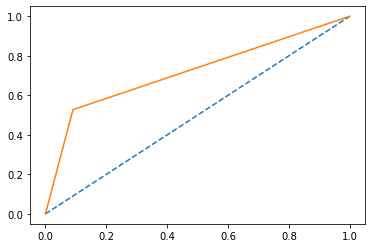

In [166]:
probs = y_test_pred_LR
# keep probabilities for the positive outcome only
probs = probs
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [167]:
#Combining the data frame in Logistics and Linear Discrimant Analysis
Linear_Log_Df_smote = pd.concat([Log_RegDf_smote,Log_RegDf_smote_tst,LDA_train_smote,LDA_test_smote],axis =0)
Linear_Log_Df_smote

,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Logistic Regression(Train For SMOTE),0.233465,0.483182,3.200716e+14
0,Logistic Regression(Test For SMOTE),0.220091,0.469139,3.613744e+14
0,Linear Discriminant Analysis(Train For SMOTE),0.252568,0.502562,2.252338e+14
0,Linear Discriminant Analysis(Test For SMOTE),0.232041,0.481706,2.566336e+14


# Start Of Random Forest Classifier(SMOTE)

In [250]:
#Rfcl = RandomForestClassifier(n_estimators=301,min_samples_leaf=3,min_samples_split=10)
#Rfcl = RandomForestClassifier(n_estimators=501,min_samples_leaf=50,min_samples_split=150,max_depth=10,max_features=6)
Rfcl = RandomForestClassifier(n_estimators=501,min_samples_leaf=100,min_samples_split=80,max_depth=13,max_features=3)
Rfcl.fit(X_res,y_res) 

RandomForestClassifier(max_depth=13, max_features=3, min_samples_leaf=100,
                       min_samples_split=80, n_estimators=501)

# Train Data Set Check for Random Forest Classifier(SMOTE)

In [251]:
Observed = y_res
Predicted = Rfcl.predict(X_res)

mse = np.mean((Observed-Predicted)**2)
print("The Mean Squared Error is:",mse)
rmse = sqrt(mse)
print("The Root Mean Squared Error is:",rmse)
print("The Mean Absolute Percentage Error is:",mean_absolute_percentage_error(Observed,Predicted))
Rfcl_train_smote = pd.DataFrame({"Model": "Random Forest Classifier(Train For SMOTE)","Mean Squared Error":[mse],"Root Mean Squared Error": [rmse],"Mean Absolute Percentage Error":[mean_absolute_percentage_error(Observed,Predicted)]})
Rfcl_train_smote

The Mean Squared Error is: 0.21008275592432502
The Root Mean Squared Error is: 0.45834785471770784
The Mean Absolute Percentage Error is: 170502707498138.1


,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Random Forest Classifier(Train For SMOTE),0.210083,0.458348,1.705027e+14


In [252]:
#prediction data for Train data set
y_train_pred_LR = Rfcl.predict(X_res)

<AxesSubplot:>

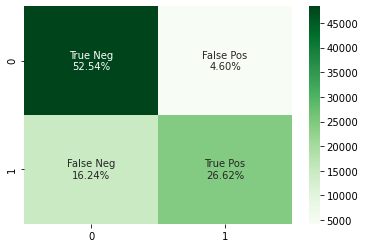

In [171]:
Confusion_MatrixForLogReg = confusion_matrix(y_res,y_train_pred_LR)

names_on_cm = ["True Neg","False Pos","False Neg","True Pos"]
names_percentages = ["{0:.2%}".format(value_data) for value_data in
                     Confusion_MatrixForLogReg.flatten()/np.sum(Confusion_MatrixForLogReg)]
labels = [f"{v1}\n{v3}" for v1, v3 in
          zip(names_on_cm,names_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(Confusion_MatrixForLogReg, annot=labels, fmt="", cmap='Greens')

In [172]:
print(classification_report(y_res,y_train_pred_LR))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83     52616
           1       0.85      0.62      0.72     39462

    accuracy                           0.79     92078
   macro avg       0.81      0.77      0.78     92078
weighted avg       0.80      0.79      0.78     92078



In [253]:
#Data Frame Creation for Accuracy , Precision and Recall
Confusion_MatrixData = confusion_matrix(y_res,y_train_pred_LR)

Accuracy = (Confusion_MatrixData[1][0] + Confusion_MatrixData[0][0])/(Confusion_MatrixData[0][0] + Confusion_MatrixData[0][1] + Confusion_MatrixData[1][0]+ Confusion_MatrixData[1][1])
Senstivity = (Confusion_MatrixData[1][1]) /  (Confusion_MatrixData[1][1] + Confusion_MatrixData[1][0])
Precision = (Confusion_MatrixData[1][1]) / (Confusion_MatrixData[1][1] + (Confusion_MatrixData[0][1])) 

Performance_Metric_RFCL_smote = pd.DataFrame({"Model": ["Random Forest Classifier(Train For SMOTE)"],"Accuracy" : [Accuracy],"Senstivity":[Senstivity],"Precision":[Precision]})
Performance_Metric_RFCL_smote

,Model,Accuracy,Senstivity,Precision
0,Random Forest Classifier(Train For SMOTE),0.705793,0.598145,0.871318


AUC: 0.770


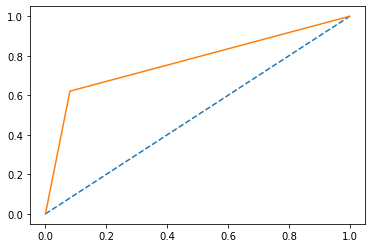

In [174]:
probs = y_train_pred_LR
# keep probabilities for the positive outcome only
probs = probs
# calculate AUC
traun_auc = roc_auc_score(y_res, probs)
print('AUC: %.3f' % traun_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# Test Data Set Check for Random Forest Classifier(SMOTE)

In [225]:
Observed = y_test
Predicted = Rfcl.predict(X_test)

mse = np.mean((Observed-Predicted)**2)
print("The Mean Squared Error is:",mse)
rmse = sqrt(mse)
print("The Root Mean Squared Error is:",rmse)
print("The Mean Absolute Percentage Error is:",mean_absolute_percentage_error(Observed,Predicted))
Rfcl_test_smote = pd.DataFrame({"Model": "Random Forest Classifier(Test For SMOTE)","Mean Squared Error":[mse],"Root Mean Squared Error": [rmse],"Mean Absolute Percentage Error":[mean_absolute_percentage_error(Observed,Predicted)]})
Rfcl_test_smote

The Mean Squared Error is: 0.19035653460647178
The Root Mean Squared Error is: 0.43629867591647786
The Mean Absolute Percentage Error is: 198793617859473.38


,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Random Forest Classifier(Test For SMOTE),0.190357,0.436299,1.987936e+14


In [227]:
#prediction data for test data set
y_test_pred_LR = Rfcl.predict(X_test)

<AxesSubplot:>

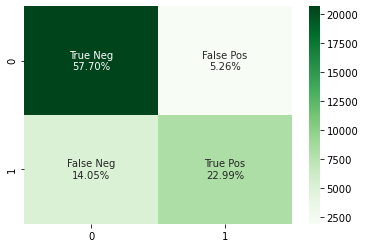

In [177]:
Confusion_MatrixForLogReg = confusion_matrix(y_test,y_test_pred_LR)

names_on_cm = ["True Neg","False Pos","False Neg","True Pos"]
names_percentages = ["{0:.2%}".format(value_data) for value_data in
                     Confusion_MatrixForLogReg.flatten()/np.sum(Confusion_MatrixForLogReg)]
labels = [f"{v1}\n{v3}" for v1, v3 in
          zip(names_on_cm,names_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(Confusion_MatrixForLogReg, annot=labels, fmt="", cmap='Greens')

In [178]:
print(classification_report(y_test,y_test_pred_LR))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86     22550
           1       0.81      0.62      0.70     13267

    accuracy                           0.81     35817
   macro avg       0.81      0.77      0.78     35817
weighted avg       0.81      0.81      0.80     35817



In [228]:
#Data Frame Creation for Accuracy , Precision and Recall
Confusion_MatrixData = confusion_matrix(y_test,y_test_pred_LR)

Accuracy = (Confusion_MatrixData[1][0] + Confusion_MatrixData[0][0])/(Confusion_MatrixData[0][0] + Confusion_MatrixData[0][1] + Confusion_MatrixData[1][0]+ Confusion_MatrixData[1][1])
Senstivity = (Confusion_MatrixData[1][1]) /  (Confusion_MatrixData[1][1] + Confusion_MatrixData[1][0])
Precision = (Confusion_MatrixData[1][1]) / (Confusion_MatrixData[1][1] + (Confusion_MatrixData[0][1])) 

Performance_Metric_RFCL_test_smote = pd.DataFrame({"Model": ["Random Forest Classifier(Test For SMOTE)"],"Accuracy" : [Accuracy],"Senstivity":[Senstivity],"Precision":[Precision]})
Performance_Metric_RFCL_test_smote

,Model,Accuracy,Senstivity,Precision
0,Random Forest Classifier(Test For SMOTE),0.731664,0.605261,0.835501


AUC: 0.769


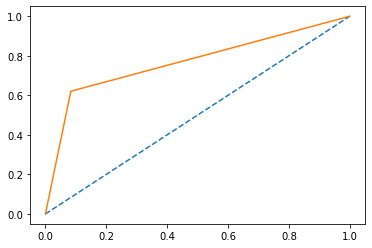

In [180]:
probs = y_test_pred_LR
# keep probabilities for the positive outcome only
probs = probs
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# Starting of Decision Tree Classifier(SMOTE)

In [181]:
DT = DecisionTreeClassifier(criterion="gini")
DT.fit(X_res,y_res)

DecisionTreeClassifier()

# Train Data Set Check for Decision Tree Classifier(SMOTE)

In [182]:
Observed = y_res
Predicted = DT.predict(X_res)

mse = np.mean((Observed-Predicted)**2)
print("The Mean Squared Error is:",mse)
rmse = sqrt(mse)
print("The Root Mean Squared Error is:",rmse)
print("The Mean Absolute Percentage Error is:",mean_absolute_percentage_error(Observed,Predicted))
DT_train_smote = pd.DataFrame({"Model": "Decision Tree Classifier(Train For SMOTE)","Mean Squared Error":[mse],"Root Mean Squared Error": [rmse],"Mean Absolute Percentage Error":[mean_absolute_percentage_error(Observed,Predicted)]})
DT_train_smote

The Mean Squared Error is: 0.14145615673667977
The Root Mean Squared Error is: 0.3761065763007605
The Mean Absolute Percentage Error is: 244944796084530.97


,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Decision Tree Classifier(Train For SMOTE),0.141456,0.376107,2.449448e+14


In [183]:
#prediction data for Train data set
y_train_pred_LR = DT.predict(X_res)

<AxesSubplot:>

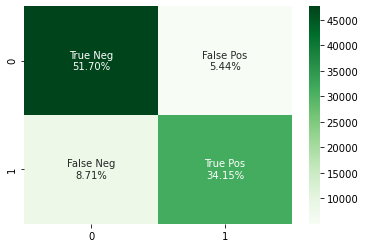

In [184]:
Confusion_MatrixForLogReg = confusion_matrix(y_res,y_train_pred_LR)

names_on_cm = ["True Neg","False Pos","False Neg","True Pos"]
names_percentages = ["{0:.2%}".format(value_data) for value_data in
                     Confusion_MatrixForLogReg.flatten()/np.sum(Confusion_MatrixForLogReg)]
labels = [f"{v1}\n{v3}" for v1, v3 in
          zip(names_on_cm,names_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(Confusion_MatrixForLogReg, annot=labels, fmt="", cmap='Greens')

In [185]:
print(classification_report(y_res,y_train_pred_LR))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     52616
           1       0.86      0.80      0.83     39462

    accuracy                           0.86     92078
   macro avg       0.86      0.85      0.85     92078
weighted avg       0.86      0.86      0.86     92078



In [186]:
#Data Frame Creation for Accuracy , Precision and Recall
Confusion_MatrixData = confusion_matrix(y_res,y_train_pred_LR)

Accuracy = (Confusion_MatrixData[1][0] + Confusion_MatrixData[0][0])/(Confusion_MatrixData[0][0] + Confusion_MatrixData[0][1] + Confusion_MatrixData[1][0]+ Confusion_MatrixData[1][1])
Senstivity = (Confusion_MatrixData[1][1]) /  (Confusion_MatrixData[1][1] + Confusion_MatrixData[1][0])
Precision = (Confusion_MatrixData[1][1]) / (Confusion_MatrixData[1][1] + (Confusion_MatrixData[0][1])) 

Performance_Metric_DT_smote = pd.DataFrame({"Model": ["Decision Tree Classifier(Train For SMOTE)"],"Accuracy" : [Accuracy],"Senstivity":[Senstivity],"Precision":[Precision]})
Performance_Metric_DT_smote

,Model,Accuracy,Senstivity,Precision
0,Decision Tree Classifier(Train For SMOTE),0.604107,0.796843,0.862618


AUC: 0.851


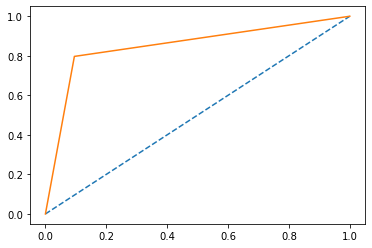

In [187]:
probs = y_train_pred_LR
# keep probabilities for the positive outcome only
probs = probs
# calculate AUC
traun_auc = roc_auc_score(y_res, probs)
print('AUC: %.3f' % traun_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# Test Data Set Check for Decision Tree Classifier(SMOTE)

In [188]:
Observed = y_test
Predicted = DT.predict(X_test)

mse = np.mean((Observed-Predicted)**2)
print("The Mean Squared Error is:",mse)
rmse = sqrt(mse)
print("The Root Mean Squared Error is:",rmse)
print("The Mean Absolute Percentage Error is:",mean_absolute_percentage_error(Observed,Predicted))
DT_test_smote = pd.DataFrame({"Model": "Decision Tree Classifier(Test For SMOTE)","Mean Squared Error":[mse],"Root Mean Squared Error": [rmse],"Mean Absolute Percentage Error":[mean_absolute_percentage_error(Observed,Predicted)]})
DT_test_smote

The Mean Squared Error is: 0.19462824915542898
The Root Mean Squared Error is: 0.44116691756684223
The Mean Absolute Percentage Error is: 406263238016418.94


,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Decision Tree Classifier(Test For SMOTE),0.194628,0.441167,4.062632e+14


In [189]:
#prediction data for test data set
y_test_pred_LR = DT.predict(X_test)

<AxesSubplot:>

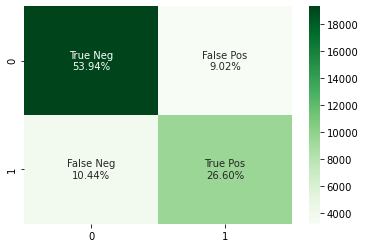

In [190]:
Confusion_MatrixForLogReg = confusion_matrix(y_test,y_test_pred_LR)

names_on_cm = ["True Neg","False Pos","False Neg","True Pos"]
names_percentages = ["{0:.2%}".format(value_data) for value_data in
                     Confusion_MatrixForLogReg.flatten()/np.sum(Confusion_MatrixForLogReg)]
labels = [f"{v1}\n{v3}" for v1, v3 in
          zip(names_on_cm,names_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(Confusion_MatrixForLogReg, annot=labels, fmt="", cmap='Greens')

In [191]:
print(classification_report(y_test,y_test_pred_LR))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85     22550
           1       0.75      0.72      0.73     13267

    accuracy                           0.81     35817
   macro avg       0.79      0.79      0.79     35817
weighted avg       0.80      0.81      0.80     35817



In [192]:
#Data Frame Creation for Accuracy , Precision and Recall
Confusion_MatrixData = confusion_matrix(y_test,y_test_pred_LR)

Accuracy = (Confusion_MatrixData[1][0] + Confusion_MatrixData[0][0])/(Confusion_MatrixData[0][0] + Confusion_MatrixData[0][1] + Confusion_MatrixData[1][0]+ Confusion_MatrixData[1][1])
Senstivity = (Confusion_MatrixData[1][1]) /  (Confusion_MatrixData[1][1] + Confusion_MatrixData[1][0])
Precision = (Confusion_MatrixData[1][1]) / (Confusion_MatrixData[1][1] + (Confusion_MatrixData[0][1])) 

Performance_Metric_DT_test_smote = pd.DataFrame({"Model": ["Decision Tree Classifier(Test For SMOTE)"],"Accuracy" : [Accuracy],"Senstivity":[Senstivity],"Precision":[Precision]})
Performance_Metric_DT_test_smote

,Model,Accuracy,Senstivity,Precision
0,Decision Tree Classifier(Test For SMOTE),0.6438,0.718098,0.746747


AUC: 0.787


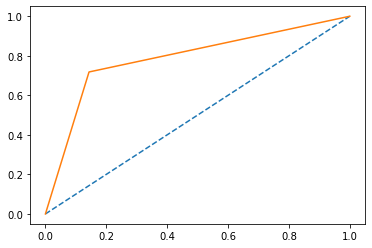

In [193]:
probs = y_test_pred_LR
# keep probabilities for the positive outcome only
probs = probs
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# Starting of MLP Classifier(SMOTE)

In [194]:
MLP = MLPClassifier()
MLP.fit(X_res,y_res)

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

# Train Data Set Check for MLP Classifier(SMOTE)

In [195]:
Observed = y_res
Predicted = MLP.predict(X_res)

mse = np.mean((Observed-Predicted)**2)
print("The Mean Squared Error is:",mse)
rmse = sqrt(mse)
print("The Root Mean Squared Error is:",rmse)
print("The Mean Absolute Percentage Error is:",mean_absolute_percentage_error(Observed,Predicted))
MLP_train_smote = pd.DataFrame({"Model": "MLP Classifier(Train For SMOTE)","Mean Squared Error":[mse],"Root Mean Squared Error": [rmse],"Mean Absolute Percentage Error":[mean_absolute_percentage_error(Observed,Predicted)]})
MLP_train_smote

The Mean Squared Error is: 0.19179391385564412
The Root Mean Squared Error is: 0.43794282030379733
The Mean Absolute Percentage Error is: 323397562242595.7


,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,MLP Classifier(Train For SMOTE),0.191794,0.437943,3.233976e+14


In [196]:
#prediction data for Train data set
y_train_pred_LR = MLP.predict(X_res)

<AxesSubplot:>

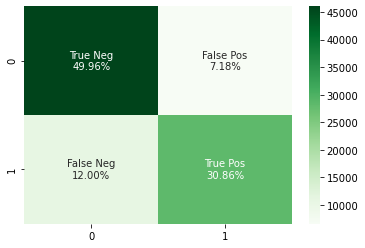

In [197]:
Confusion_MatrixForLogReg = confusion_matrix(y_res,y_train_pred_LR)

names_on_cm = ["True Neg","False Pos","False Neg","True Pos"]
names_percentages = ["{0:.2%}".format(value_data) for value_data in
                     Confusion_MatrixForLogReg.flatten()/np.sum(Confusion_MatrixForLogReg)]
labels = [f"{v1}\n{v3}" for v1, v3 in
          zip(names_on_cm,names_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(Confusion_MatrixForLogReg, annot=labels, fmt="", cmap='Greens')

In [198]:
print(classification_report(y_res,y_train_pred_LR))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84     52616
           1       0.81      0.72      0.76     39462

    accuracy                           0.81     92078
   macro avg       0.81      0.80      0.80     92078
weighted avg       0.81      0.81      0.81     92078



In [199]:
#Data Frame Creation for Accuracy , Precision and Recall
Confusion_MatrixData = confusion_matrix(y_res,y_train_pred_LR)

Accuracy = (Confusion_MatrixData[1][0] + Confusion_MatrixData[0][0])/(Confusion_MatrixData[0][0] + Confusion_MatrixData[0][1] + Confusion_MatrixData[1][0]+ Confusion_MatrixData[1][1])
Senstivity = (Confusion_MatrixData[1][1]) /  (Confusion_MatrixData[1][1] + Confusion_MatrixData[1][0])
Precision = (Confusion_MatrixData[1][1]) / (Confusion_MatrixData[1][1] + (Confusion_MatrixData[0][1])) 

Performance_Metric_MLP_smote = pd.DataFrame({"Model": ["MLP Classifier(Train For SMOTE)"],"Accuracy" : [Accuracy],"Senstivity":[Senstivity],"Precision":[Precision]})
Performance_Metric_MLP_smote

,Model,Accuracy,Senstivity,Precision
0,MLP Classifier(Train For SMOTE),0.619605,0.720034,0.811226


AUC: 0.797


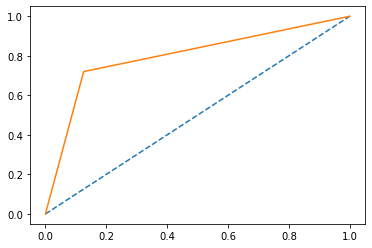

In [200]:
probs = y_train_pred_LR
# keep probabilities for the positive outcome only
probs = probs
# calculate AUC
traun_auc = roc_auc_score(y_res, probs)
print('AUC: %.3f' % traun_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# Test Data Set Check for MLP Classifier(SMOTE)

In [201]:
Observed = y_test
Predicted = MLP.predict(X_test)

mse = np.mean((Observed-Predicted)**2)
print("The Mean Squared Error is:",mse)
rmse = sqrt(mse)
print("The Root Mean Squared Error is:",rmse)
print("The Mean Absolute Percentage Error is:",mean_absolute_percentage_error(Observed,Predicted))
MLP_test_smote = pd.DataFrame({"Model": "MLP Classifier(Test For SMOTE)","Mean Squared Error":[mse],"Root Mean Squared Error": [rmse],"Mean Absolute Percentage Error":[mean_absolute_percentage_error(Observed,Predicted)]})
MLP_test_smote

The Mean Squared Error is: 0.19105452717983082
The Root Mean Squared Error is: 0.43709784623105935
The Mean Absolute Percentage Error is: 373696794609965.06


,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,MLP Classifier(Test For SMOTE),0.191055,0.437098,3.736968e+14


In [202]:
#prediction data for test data set
y_test_pred_LR = MLP.predict(X_test)

<AxesSubplot:>

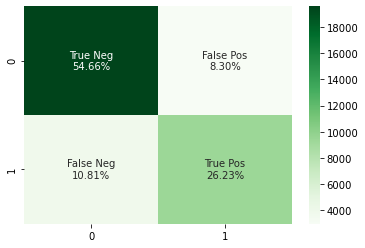

In [203]:
Confusion_MatrixForLogReg = confusion_matrix(y_test,y_test_pred_LR)

names_on_cm = ["True Neg","False Pos","False Neg","True Pos"]
names_percentages = ["{0:.2%}".format(value_data) for value_data in
                     Confusion_MatrixForLogReg.flatten()/np.sum(Confusion_MatrixForLogReg)]
labels = [f"{v1}\n{v3}" for v1, v3 in
          zip(names_on_cm,names_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(Confusion_MatrixForLogReg, annot=labels, fmt="", cmap='Greens')

In [204]:
print(classification_report(y_test,y_test_pred_LR))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85     22550
           1       0.76      0.71      0.73     13267

    accuracy                           0.81     35817
   macro avg       0.80      0.79      0.79     35817
weighted avg       0.81      0.81      0.81     35817



In [205]:
#Data Frame Creation for Accuracy , Precision and Recall
Confusion_MatrixData = confusion_matrix(y_test,y_test_pred_LR)

Accuracy = (Confusion_MatrixData[1][0] + Confusion_MatrixData[0][0])/(Confusion_MatrixData[0][0] + Confusion_MatrixData[0][1] + Confusion_MatrixData[1][0]+ Confusion_MatrixData[1][1])
Senstivity = (Confusion_MatrixData[1][1]) /  (Confusion_MatrixData[1][1] + Confusion_MatrixData[1][0])
Precision = (Confusion_MatrixData[1][1]) / (Confusion_MatrixData[1][1] + (Confusion_MatrixData[0][1])) 

Performance_Metric_MLP_test_smote = pd.DataFrame({"Model": ["MLP Classifier(Test For SMOTE)"],"Accuracy" : [Accuracy],"Senstivity":[Senstivity],"Precision":[Precision]})
Performance_Metric_MLP_test_smote

,Model,Accuracy,Senstivity,Precision
0,MLP Classifier(Test For SMOTE),0.654689,0.708223,0.759702


AUC: 0.788


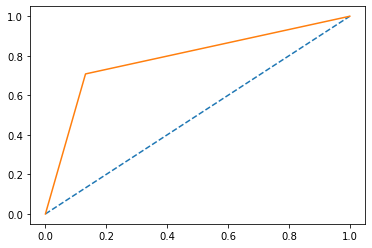

In [206]:
probs = y_test_pred_LR
# keep probabilities for the positive outcome only
probs = probs
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# Starting of AdaBoost Classifier(SMOTE)

In [207]:
ABC = AdaBoostClassifier()
ABC.fit(X_res,y_res)

AdaBoostClassifier()

# Train Data Set Check for AdaBoost Classifier(SMOTE)

In [208]:
Observed = y_res
Predicted = ABC.predict(X_res)

mse = np.mean((Observed-Predicted)**2)
print("The Mean Squared Error is:",mse)
rmse = sqrt(mse)
print("The Root Mean Squared Error is:",rmse)
print("The Mean Absolute Percentage Error is:",mean_absolute_percentage_error(Observed,Predicted))
ABC_train_smote = pd.DataFrame({"Model": "Ada Boost Classifier(Train For SMOTE)","Mean Squared Error":[mse],"Root Mean Squared Error": [rmse],"Mean Absolute Percentage Error":[mean_absolute_percentage_error(Observed,Predicted)]})
ABC_train_smote

The Mean Squared Error is: 0.2116032059775408
The Root Mean Squared Error is: 0.4600034847449971
The Mean Absolute Percentage Error is: 241227582725420.78


,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Ada Boost Classifier(Train For SMOTE),0.211603,0.460003,2.412276e+14


In [209]:
#prediction data for Train data set
y_train_pred_LR = ABC.predict(X_res)

<AxesSubplot:>

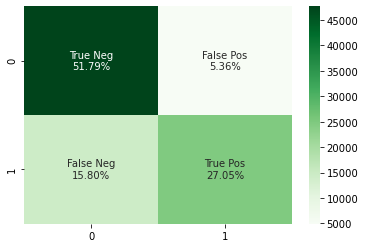

In [210]:
Confusion_MatrixForLogReg = confusion_matrix(y_res,y_train_pred_LR)

names_on_cm = ["True Neg","False Pos","False Neg","True Pos"]
names_percentages = ["{0:.2%}".format(value_data) for value_data in
                     Confusion_MatrixForLogReg.flatten()/np.sum(Confusion_MatrixForLogReg)]
labels = [f"{v1}\n{v3}" for v1, v3 in
          zip(names_on_cm,names_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(Confusion_MatrixForLogReg, annot=labels, fmt="", cmap='Greens')

In [211]:
print(classification_report(y_res,y_train_pred_LR))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83     52616
           1       0.83      0.63      0.72     39462

    accuracy                           0.79     92078
   macro avg       0.80      0.77      0.77     92078
weighted avg       0.80      0.79      0.78     92078



In [212]:
#Data Frame Creation for Accuracy , Precision and Recall
Confusion_MatrixData = confusion_matrix(y_res,y_train_pred_LR)

Accuracy = (Confusion_MatrixData[1][0] + Confusion_MatrixData[0][0])/(Confusion_MatrixData[0][0] + Confusion_MatrixData[0][1] + Confusion_MatrixData[1][0]+ Confusion_MatrixData[1][1])
Senstivity = (Confusion_MatrixData[1][1]) /  (Confusion_MatrixData[1][1] + Confusion_MatrixData[1][0])
Precision = (Confusion_MatrixData[1][1]) / (Confusion_MatrixData[1][1] + (Confusion_MatrixData[0][1])) 

Performance_Metric_ABC_smote = pd.DataFrame({"Model": ["Ada Boost Classifier(Train For SMOTE)"],"Accuracy" : [Accuracy],"Senstivity":[Senstivity],"Precision":[Precision]})
Performance_Metric_ABC_smote

,Model,Accuracy,Senstivity,Precision
0,Ada Boost Classifier(Train For SMOTE),0.675905,0.63124,0.83473


AUC: 0.769


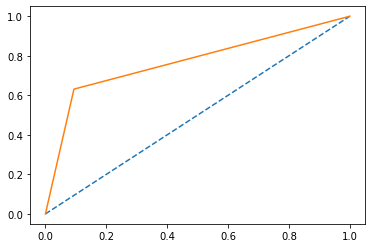

In [213]:
probs = y_train_pred_LR
# keep probabilities for the positive outcome only
probs = probs
# calculate AUC
traun_auc = roc_auc_score(y_res, probs)
print('AUC: %.3f' % traun_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# Test Data Set Check for AdaBoost Classifier(SMOTE)

In [214]:
Observed = y_test
Predicted = ABC.predict(X_test)

mse = np.mean((Observed-Predicted)**2)
print("The Mean Squared Error is:",mse)
rmse = sqrt(mse)
print("The Root Mean Squared Error is:",rmse)
print("The Mean Absolute Percentage Error is:",mean_absolute_percentage_error(Observed,Predicted))
ABC_test_smote = pd.DataFrame({"Model": "Ada Boost Classifier(Test For SMOTE)","Mean Squared Error":[mse],"Root Mean Squared Error": [rmse],"Mean Absolute Percentage Error":[mean_absolute_percentage_error(Observed,Predicted)]})
ABC_test_smote

The Mean Squared Error is: 0.1964709495490968
The Root Mean Squared Error is: 0.4432504366033911
The Mean Absolute Percentage Error is: 271093637005075.62


,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Ada Boost Classifier(Test For SMOTE),0.196471,0.44325,2.710936e+14


In [215]:
#prediction data for test data set
y_test_pred_LR = ABC.predict(X_test)

<AxesSubplot:>

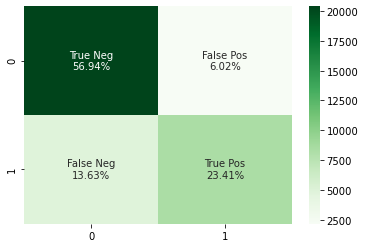

In [216]:
Confusion_MatrixForLogReg = confusion_matrix(y_test,y_test_pred_LR)

names_on_cm = ["True Neg","False Pos","False Neg","True Pos"]
names_percentages = ["{0:.2%}".format(value_data) for value_data in
                     Confusion_MatrixForLogReg.flatten()/np.sum(Confusion_MatrixForLogReg)]
labels = [f"{v1}\n{v3}" for v1, v3 in
          zip(names_on_cm,names_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(Confusion_MatrixForLogReg, annot=labels, fmt="", cmap='Greens')

In [217]:
print(classification_report(y_test,y_test_pred_LR))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85     22550
           1       0.80      0.63      0.70     13267

    accuracy                           0.80     35817
   macro avg       0.80      0.77      0.78     35817
weighted avg       0.80      0.80      0.80     35817



In [218]:
#Data Frame Creation for Accuracy , Precision and Recall
Confusion_MatrixData = confusion_matrix(y_test,y_test_pred_LR)

Accuracy = (Confusion_MatrixData[1][0] + Confusion_MatrixData[0][0])/(Confusion_MatrixData[0][0] + Confusion_MatrixData[0][1] + Confusion_MatrixData[1][0]+ Confusion_MatrixData[1][1])
Senstivity = (Confusion_MatrixData[1][1]) /  (Confusion_MatrixData[1][1] + Confusion_MatrixData[1][0])
Precision = (Confusion_MatrixData[1][1]) / (Confusion_MatrixData[1][1] + (Confusion_MatrixData[0][1])) 

Performance_Metric_ABC_test_smote = pd.DataFrame({"Model": ["Ada Boost Classifier(Test For SMOTE)"],"Accuracy" : [Accuracy],"Senstivity":[Senstivity],"Precision":[Precision]})
Performance_Metric_ABC_test_smote

,Model,Accuracy,Senstivity,Precision
0,Ada Boost Classifier(Test For SMOTE),0.70567,0.632095,0.795485


AUC: 0.768


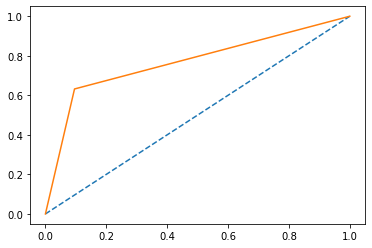

In [219]:
probs = y_test_pred_LR
# keep probabilities for the positive outcome only
probs = probs
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# Performace for all the metric calculated for all the models for train and test data set (SMOTE)

In [220]:
Total_MetricDf_Smote = pd.concat([Performance_Metric_LR_smote, Performance_Metric_LR_smote_tst, Performance_Metric_LDA_smote, Performance_Metric_LDA_test_smote, Performance_Metric_RFCL_smote, Performance_Metric_RFCL_test_smote, Performance_Metric_DT_smote, Performance_Metric_DT_test_smote, Performance_Metric_MLP_smote, Performance_Metric_MLP_test_smote, Performance_Metric_ABC_smote, Performance_Metric_ABC_test_smote],axis =0)
Metric_Df_SMOTE = pd.concat([Log_RegDf_smote, Log_RegDf_smote_tst, LDA_train_smote, LDA_test_smote, Rfcl_train_smote, Rfcl_test_smote, DT_train_smote, DT_test_smote, MLP_train_smote, MLP_test_smote, ABC_train_smote, ABC_test_smote])
Total_MetricDf_Smote = pd.concat([Total_MetricDf_Smote,Metric_Df_SMOTE[["Mean Squared Error","Root Mean Squared Error","Mean Absolute Percentage Error"]]],axis =1)
Total_MetricDf_Smote
Total_MetricDf_Smote.rename({"Senstivity": "Sensitivity"},axis ="columns")
Total_MetricDf_Smote.columns = ["Model","Accuracy","Sensitivity","Precision","Mean Squared Error","Root Mean Squared Error","Mean Absolute Percentage Error"]
Total_MetricDf_Smote

,Model,Accuracy,Sensitivity,Precision,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Logistic Regression(Train For SMOTE),0.662753,0.621079,0.789264,0.233465,0.483182,3.200716e+14
0,Logistic Regression(Test For SMOTE),0.689198,0.622447,0.741825,0.220091,0.469139,3.613744e+14
0,Linear Discriminant Analysis(Train For SMOTE),0.723973,0.527368,0.818815,0.252568,0.502562,2.252338e+14
0,Linear Discriminant Analysis(Test For SMOTE),0.747662,0.527399,0.774176,0.232041,0.481706,2.566336e+14
0,Random Forest Classifier(Train For SMOTE),0.687754,0.621155,0.852562,0.208399,0.456508,2.073325e+14
0,Random Forest Classifier(Test For SMOTE),0.717453,0.620713,0.813735,0.193121,0.439455,2.370183e+14
0,Decision Tree Classifier(Train For SMOTE),0.604107,0.796843,0.862618,0.141456,0.376107,2.449448e+14
0,Decision Tree Classifier(Test For SMOTE),0.643800,0.718098,0.746747,0.194628,0.441167,4.062632e+14
0,MLP Classifier(Train For SMOTE),0.619605,0.720034,0.811226,0.191794,0.437943,3.233976e+14
0,MLP Classifier(Test For SMOTE),0.654689,0.708223,0.759702,0.191055,0.437098,3.736968e+14
